<a href="https://colab.research.google.com/github/zacharyfann/Swin-Transformer-Bone-X-Ray-Abnormality/blob/main/SwinTransformerXray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mount Google Drive if needed
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#NO LONGER NEED TO RUN
# import pandas as pd
# import os

# # Dataset root path (if needed elsewhere)
# DATASET_PATH = "/content/drive/MyDrive/MURA-v1.1/MURA-v1.1/train"

# # CSV Paths
# TRAIN_CSV_PATH = "/content/drive/MyDrive/MURA-v1.1/MURA-v1.1/train_labeled_studies_processed.csv"
# VALID_CSV_PATH = "/content/drive/MyDrive/MURA-v1.1/MURA-v1.1/valid_labeled_studies_processed.csv"

# # Function to reformat the image paths for use in Colab/Transformer
# def format_image_path(old_path):
#     # Remove the Windows root and update the path for Google Drive
#     new_path = old_path.replace("C:\\Users\\zacha\\MURA_MSK Xrays Info\\MURA-v1.1",
#                                 "/content/drive/MyDrive/MURA-v1.1/MURA-v1.1")
#     new_path = new_path.replace("\\", "/")  # Ensure forward slashes
#     return new_path

# # Function to extract the x-ray type from the formatted path
# def extract_xray_type(formatted_path):
#     """
#     Given a formatted path, extract the x-ray type.
#     This assumes that the directory following the "train" or "valid" folder
#     represents the x-ray type (e.g., "XR_WRIST").
#     """
#     parts = formatted_path.split("/")
#     if "train" in parts:
#         idx = parts.index("train")
#     elif "valid" in parts:
#         idx = parts.index("valid")
#     else:
#         return "Unknown"
#     # The next directory after "train" or "valid" should be the x-ray type.
#     if len(parts) > idx + 1:
#         return parts[idx + 1]
#     else:
#         return "Unknown"

# # Load CSVs into DataFrames
# train_df = pd.read_csv(TRAIN_CSV_PATH)
# valid_df = pd.read_csv(VALID_CSV_PATH)

# # Update the image_path column by reformatting it
# train_df["image_path"] = train_df["image_path"].apply(format_image_path)
# valid_df["image_path"] = valid_df["image_path"].apply(format_image_path)

# # Add a new column 'type' by extracting the x-ray type from the image path
# train_df["type"] = train_df["image_path"].apply(extract_xray_type)
# valid_df["type"] = valid_df["image_path"].apply(extract_xray_type)

# # (Optional) Print a few rows to verify changes
# print("Train DataFrame sample:")
# print(train_df.head())
# print("\nValidation DataFrame sample:")
# print(valid_df.head())

# # Define new file paths for the updated CSVs
# UPDATED_TRAIN_CSV_PATH = "/content/drive/MyDrive/MURA-v1.1/MURA-v1.1/train_labeled_studies_processed_updated.csv"
# UPDATED_VALID_CSV_PATH = "/content/drive/MyDrive/MURA-v1.1/MURA-v1.1/valid_labeled_studies_processed_updated.csv"

# # Save the updated DataFrames to CSV files (without the index)
# train_df.to_csv(UPDATED_TRAIN_CSV_PATH, index=False)
# valid_df.to_csv(UPDATED_VALID_CSV_PATH, index=False)

# print(f"Updated train CSV saved to: {UPDATED_TRAIN_CSV_PATH}")
# print(f"Updated valid CSV saved to: {UPDATED_VALID_CSV_PATH}")


In [ ]:
#Define Train and Validation Datasets

import pandas as pd

# Define paths to the updated CSV files
UPDATED_TRAIN_CSV_PATH = "/content/drive/MyDrive/MURA-v1.1/MURA-v1.1/train_labeled_studies_processed_updated.csv"
UPDATED_VALID_CSV_PATH = "/content/drive/MyDrive/MURA-v1.1/MURA-v1.1/valid_labeled_studies_processed_updated.csv"

# Load the preprocessed datasets
train_df = pd.read_csv(UPDATED_TRAIN_CSV_PATH)
valid_df = pd.read_csv(UPDATED_VALID_CSV_PATH)

# Print sample rows to verify
print("Train DataFrame sample:")
print(train_df.head())

print("\nValidation DataFrame sample:")
print(valid_df.head())


Train DataFrame sample:
                                          image_path  label category  \
0  /content/drive/MyDrive/MURA-v1.1/MURA-v1.1/tra...      1    train   
1  /content/drive/MyDrive/MURA-v1.1/MURA-v1.1/tra...      1    train   
2  /content/drive/MyDrive/MURA-v1.1/MURA-v1.1/tra...      1    train   
3  /content/drive/MyDrive/MURA-v1.1/MURA-v1.1/tra...      1    train   
4  /content/drive/MyDrive/MURA-v1.1/MURA-v1.1/tra...      1    train   

          type  
0  XR_SHOULDER  
1  XR_SHOULDER  
2  XR_SHOULDER  
3  XR_SHOULDER  
4  XR_SHOULDER  

Validation DataFrame sample:
                                          image_path  label category      type
0  /content/drive/MyDrive/MURA-v1.1/MURA-v1.1/val...      1    valid  XR_WRIST
1  /content/drive/MyDrive/MURA-v1.1/MURA-v1.1/val...      1    valid  XR_WRIST
2  /content/drive/MyDrive/MURA-v1.1/MURA-v1.1/val...      1    valid  XR_WRIST
3  /content/drive/MyDrive/MURA-v1.1/MURA-v1.1/val...      1    valid  XR_WRIST
4  /content/driv

Unique x‑ray types: ['XR_ELBOW', 'XR_FINGER', 'XR_FOREARM', 'XR_HAND', 'XR_HUMERUS', 'XR_SHOULDER', 'XR_WRIST']


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 768)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ patch_embedding (PatchEmbedding)     │ (None, 256, 256)            │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ swin_transformer (SwinTransformer)   │ (None, 256, 256)            │         791,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ swin_transformer_1 (SwinTransformer) │ (None, 256, 256)            │         791,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ patch_merging (PatchMerging)         │ (None, 64, 512)             │         524,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ xray_type (Dense)                    │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,436,375 (9.29 MB)

 Trainable params: 2,436,375 (9.29 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 95s/step - accuracy: 0.5205 - loss: 3.5218  
Epoch 1: val_accuracy improved from -inf to 0.14388, saving model to newSwinTransformerTypeOnly.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 3789s 104s/step - accuracy: 0.5175 - loss: 3.5396 - val_accuracy: 0.1439 - val_loss: 3.7582 - learning_rate: 1.0000e-04
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3016 - loss: 4.2985
Epoch 2: val_accuracy did not improve from 0.14388
36/36 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.3016 - loss: 4.3154 - val_accuracy: 0.1439 - val_loss: 7.6048 - learning_rate: 1.0000e-04
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2756 - loss: 4.1553
Epoch 3: val_accuracy improved from 0.14388 to 0.14983, saving model to newSwinTransformerTypeOnly.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.2761 - loss: 4.1460 - val_accuracy: 0.1498 - val_loss: 2.9123 - learning_rate: 1.0000e-04
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accura

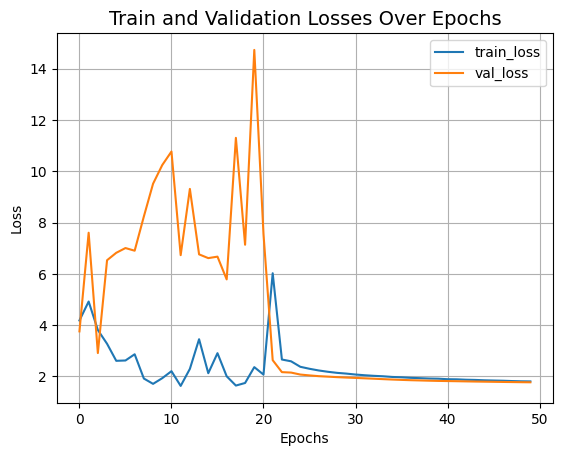

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import shutil
from keras import backend as K
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Clear previous model from memory
K.clear_session()
tf.keras.backend.clear_session()

# ---------------------------
# Model & Training Parameters (Updated for More Complexity)
# ---------------------------
image_dimension = 256  # Images resized to 256x256
patch_size = (16, 16)  # With 256x256 images, you get 16 patches per side (256 total patches)
dropout_rate = 0.1
num_heads = 8
embed_dim = 256       # Increased embedding dimension for richer representations.
num_mlp = 1024        # Larger MLP layer to capture complex patterns.
qkv_bias = True
window_size = 8        # Larger window to capture broader context.
shift_size = 4

input_shape = (image_dimension, image_dimension, 3)
num_patch_x = input_shape[0] // patch_size[0]  # 256/16 = 16
num_patch_y = input_shape[1] // patch_size[1]  # 256/16 = 16
# Each patch's dimension is 16*16*3 = 768

learning_rate = 1e-4
batch_size = 1024
num_epochs = 50
weight_decay = 0.0001
label_smoothing = 0.1

# ---------------------------
# Helper Functions for Swin Transformer (unchanged)
# ---------------------------
def window_partition(x, window_size):
    _, height, width, channels = x.shape
    patch_num_y = height // window_size
    patch_num_x = width // window_size
    x = tf.reshape(x, (-1, patch_num_y, window_size, patch_num_x, window_size, channels))
    x = tf.transpose(x, perm=(0, 1, 3, 2, 4, 5))
    windows = tf.reshape(x, (-1, window_size, window_size, channels))
    return windows

def window_reverse(windows, window_size, height, width, channels):
    patch_num_y = height // window_size
    patch_num_x = width // window_size
    x = tf.reshape(windows, (-1, patch_num_y, patch_num_x, window_size, window_size, channels))
    x = tf.transpose(x, perm=(0, 1, 3, 2, 4, 5))
    x = tf.reshape(x, (-1, height, width, channels))
    return x

class WindowAttention(layers.Layer):
    def __init__(self, dim, window_size, num_heads, qkv_bias=True, dropout_rate=0.0, **kwargs):
        super().__init__(**kwargs)
        self.dim = dim
        self.window_size = window_size  # tuple (window_height, window_width)
        self.num_heads = num_heads
        self.scale = (dim // num_heads) ** -0.5
        self.qkv = layers.Dense(dim * 3, use_bias=qkv_bias)
        self.dropout = layers.Dropout(dropout_rate)
        self.proj = layers.Dense(dim)
        num_window_elements = (2 * self.window_size[0] - 1) * (2 * self.window_size[1] - 1)
        self.relative_position_bias_table = self.add_weight(
            shape=(num_window_elements, self.num_heads),
            initializer=keras.initializers.Zeros(),
            trainable=True,
            name="relative_position_bias_table"
        )
        coords_h = np.arange(self.window_size[0])
        coords_w = np.arange(self.window_size[1])
        coords = np.stack(np.meshgrid(coords_h, coords_w, indexing="ij"))
        coords_flatten = np.reshape(coords, (2, -1))
        relative_coords = coords_flatten[:, :, None] - coords_flatten[:, None, :]
        relative_coords = np.transpose(relative_coords, (1, 2, 0))
        relative_coords[:, :, 0] += self.window_size[0] - 1
        relative_coords[:, :, 1] += self.window_size[1] - 1
        relative_coords[:, :, 0] *= 2 * self.window_size[1] - 1
        relative_position_index = np.sum(relative_coords, axis=-1)
        self.relative_position_index = tf.Variable(
            initial_value=tf.convert_to_tensor(relative_position_index),
            trainable=False,
            name="relative_position_index"
        )
    def call(self, x, mask=None):
        _, size, channels = x.shape
        head_dim = channels // self.num_heads
        x_qkv = self.qkv(x)
        x_qkv = tf.reshape(x_qkv, (-1, size, 3, self.num_heads, head_dim))
        x_qkv = tf.transpose(x_qkv, perm=(2, 0, 3, 1, 4))
        q, k, v = x_qkv[0], x_qkv[1], x_qkv[2]
        q = q * self.scale
        k = tf.transpose(k, perm=(0, 1, 3, 2))
        attn = q @ k
        num_window_elements = self.window_size[0] * self.window_size[1]
        relative_position_index_flat = tf.reshape(self.relative_position_index, (-1,))
        relative_position_bias = tf.gather(self.relative_position_bias_table, relative_position_index_flat)
        relative_position_bias = tf.reshape(relative_position_bias, (num_window_elements, num_window_elements, -1))
        relative_position_bias = tf.transpose(relative_position_bias, perm=(2, 0, 1))
        attn = attn + tf.expand_dims(relative_position_bias, axis=0)
        if mask is not None:
            nW = mask.shape[0]
            mask_float = tf.cast(tf.expand_dims(tf.expand_dims(mask, axis=1), axis=0), tf.float32)
            attn = tf.reshape(attn, (-1, nW, self.num_heads, size, size)) + mask_float
            attn = tf.reshape(attn, (-1, self.num_heads, size, size))
            attn = keras.activations.softmax(attn, axis=-1)
        else:
            attn = keras.activations.softmax(attn, axis=-1)
        attn = self.dropout(attn)
        x_qkv = attn @ v
        x_qkv = tf.transpose(x_qkv, perm=(0, 2, 1, 3))
        x_qkv = tf.reshape(x_qkv, (-1, size, channels))
        x_qkv = self.proj(x_qkv)
        x_qkv = self.dropout(x_qkv)
        return x_qkv

class SwinTransformer(layers.Layer):
    def __init__(self, dim, num_patch, num_heads, window_size=7, shift_size=0, num_mlp=1024, qkv_bias=True, dropout_rate=0.0, **kwargs):
        super().__init__(**kwargs)
        self.dim = dim
        self.num_patch = num_patch
        self.num_heads = num_heads
        self.window_size = window_size
        self.shift_size = shift_size
        self.num_mlp = num_mlp
        self.norm1 = layers.LayerNormalization(epsilon=1e-5)
        self.attn = WindowAttention(
            dim,
            window_size=(self.window_size, self.window_size),
            num_heads=num_heads,
            qkv_bias=qkv_bias,
            dropout_rate=dropout_rate,
        )
        self.drop_path = layers.Dropout(dropout_rate)
        self.norm2 = layers.LayerNormalization(epsilon=1e-5)
        self.mlp = keras.Sequential([
            layers.Dense(num_mlp),
            layers.Activation(keras.activations.gelu),
            layers.Dropout(dropout_rate),
            layers.Dense(dim),
            layers.Dropout(dropout_rate),
        ])
        if min(self.num_patch) < self.window_size:
            self.shift_size = 0
            self.window_size = min(self.num_patch)
    def build(self, input_shape):
        if self.shift_size == 0:
            self.attn_mask = None
        else:
            height, width = self.num_patch
            h_slices = (slice(0, -self.window_size),
                        slice(-self.window_size, -self.shift_size),
                        slice(-self.shift_size, None))
            w_slices = (slice(0, -self.window_size),
                        slice(-self.window_size, -self.shift_size),
                        slice(-self.shift_size, None))
            mask_array = np.zeros((1, height, width, 1))
            count = 0
            for h in h_slices:
                for w in w_slices:
                    mask_array[:, h, w, :] = count
                    count += 1
            mask_array = tf.convert_to_tensor(mask_array)
            mask_windows = window_partition(mask_array, self.window_size)
            mask_windows = tf.reshape(mask_windows, [-1, self.window_size * self.window_size])
            attn_mask = tf.expand_dims(mask_windows, axis=1) - tf.expand_dims(mask_windows, axis=2)
            attn_mask = tf.where(attn_mask != 0, -100.0, attn_mask)
            attn_mask = tf.where(attn_mask == 0, 0.0, attn_mask)
            self.attn_mask = tf.Variable(attn_mask, trainable=False)
    def call(self, x, training=False):
        height, width = self.num_patch
        x_skip = x
        x = self.norm1(x)
        x = tf.reshape(x, (-1, height, width, x.shape[-1]))
        if self.shift_size > 0:
            shifted_x = tf.roll(x, shift=[-self.shift_size, -self.shift_size], axis=[1, 2])
        else:
            shifted_x = x
        x_windows = window_partition(shifted_x, self.window_size)
        x_windows = tf.reshape(x_windows, (-1, self.window_size * self.window_size, x.shape[-1]))
        attn_windows = self.attn(x_windows, mask=self.attn_mask)
        attn_windows = tf.reshape(attn_windows, (-1, self.window_size, self.window_size, x.shape[-1]))
        shifted_x = window_reverse(attn_windows, self.window_size, height, width, x.shape[-1])
        if self.shift_size > 0:
            x = tf.roll(shifted_x, shift=[self.shift_size, self.shift_size], axis=[1, 2])
        else:
            x = shifted_x
        x = tf.reshape(x, (-1, height * width, x.shape[-1]))
        x = self.drop_path(x, training=training)
        x = x_skip + x
        x_skip = x
        x = self.norm2(x)
        x = self.mlp(x)
        x = self.drop_path(x, training=training)
        x = x_skip + x
        return x

# ---------------------------
# Patch Extraction & Embedding
# ---------------------------
def patch_extract(images):
    batch_size = tf.shape(images)[0]
    patches = tf.image.extract_patches(
        images=images,
        sizes=(1, patch_size[0], patch_size[1], 1),
        strides=(1, patch_size[0], patch_size[1], 1),
        rates=(1, 1, 1, 1),
        padding="VALID",
    )
    patch_dim = patches.shape[-1]
    patch_num = patches.shape[1]
    return tf.reshape(patches, (batch_size, patch_num * patch_num, patch_dim))

class PatchEmbedding(layers.Layer):
    def __init__(self, num_patch, embed_dim, **kwargs):
        super().__init__(**kwargs)
        self.num_patch = num_patch
        self.proj = layers.Dense(embed_dim)
        self.pos_embed = layers.Embedding(input_dim=num_patch, output_dim=embed_dim)
    def call(self, patch):
        pos = tf.range(start=0, limit=self.num_patch)
        return self.proj(patch) + self.pos_embed(pos)

class PatchMerging(layers.Layer):
    def __init__(self, num_patch, embed_dim):
        super().__init__()
        self.num_patch = num_patch  # (height, width)
        self.embed_dim = embed_dim
        self.linear_trans = layers.Dense(2 * embed_dim, use_bias=False)
    def call(self, x):
        height, width = self.num_patch
        _, _, C = x.shape
        x = tf.reshape(x, (-1, height, width, C))
        x0 = x[:, 0::2, 0::2, :]
        x1 = x[:, 1::2, 0::2, :]
        x2 = x[:, 0::2, 1::2, :]
        x3 = x[:, 1::2, 1::2, :]
        x = tf.concat([x0, x1, x2, x3], axis=-1)
        x = tf.reshape(x, (-1, (height // 2) * (width // 2), 4 * C))
        return self.linear_trans(x)

# ---------------------------
# Data Preparation for X‑Ray Type Classification Only
# ---------------------------
# Assume updated CSVs are loaded into train_df and valid_df.
# They should have columns: "image_path" and "type" (string).
unique_types = sorted(train_df["type"].unique())
type_to_idx = {tp: i for i, tp in enumerate(unique_types)}
train_df["type_idx"] = train_df["type"].map(type_to_idx)
valid_df["type_idx"] = valid_df["type"].map(type_to_idx)
num_types = len(unique_types)
print("Unique x‑ray types:", unique_types)

def load_and_preprocess(image_path, xray_type):
    xray_type = tf.cast(xray_type, tf.int32)
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [image_dimension, image_dimension])
    image = tf.cast(image, tf.float32) / 255.0
    return image, xray_type

def augment(image):
    image = tf.image.random_flip_left_right(image)
    return image

# Create training dataset (with augmentation) for x‑ray type classification
train_ds = tf.data.Dataset.from_tensor_slices((
    train_df["image_path"].values,
    train_df["type_idx"].values
))
train_ds = train_ds.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.map(lambda img, label: (augment(img), label), num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.batch(batch_size)
train_ds = train_ds.map(lambda imgs, labels: (patch_extract(imgs), labels), num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)

# Create validation dataset (no augmentation)
val_ds = tf.data.Dataset.from_tensor_slices((
    valid_df["image_path"].values,
    valid_df["type_idx"].values
))
val_ds = val_ds.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.batch(batch_size)
val_ds = val_ds.map(lambda imgs, labels: (patch_extract(imgs), labels), num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

# ---------------------------
# Build the Model for X‑Ray Type Classification Only
# ---------------------------
input_layer = layers.Input(shape=(num_patch_x * num_patch_y, patch_size[0] * patch_size[1] * 3))
x = PatchEmbedding(num_patch_x * num_patch_y, embed_dim)(input_layer)
x = SwinTransformer(
    dim=embed_dim,
    num_patch=(num_patch_x, num_patch_y),
    num_heads=num_heads,
    window_size=window_size,
    shift_size=0,
    num_mlp=num_mlp,
    qkv_bias=qkv_bias,
    dropout_rate=dropout_rate,
)(x)
x = SwinTransformer(
    dim=embed_dim,
    num_patch=(num_patch_x, num_patch_y),
    num_heads=num_heads,
    window_size=window_size,
    shift_size=shift_size,
    num_mlp=num_mlp,
    qkv_bias=qkv_bias,
    dropout_rate=dropout_rate,
)(x)
x = PatchMerging((num_patch_x, num_patch_y), embed_dim=embed_dim)(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(dropout_rate)(x)
# X‑ray type branch (multi‑class classification only)
xray_branch = layers.Dense(128, activation='relu')(x)
xray_output = layers.Dense(num_types, activation='softmax', name='xray_type')(xray_branch)

model = keras.Model(inputs=input_layer, outputs=xray_output)
model.summary()

# ---------------------------
# Compile the Model (Single Output)
# ---------------------------
model.compile(
    optimizer=keras.optimizers.AdamW(learning_rate=learning_rate, weight_decay=weight_decay),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="accuracy")]
)

# ---------------------------
# Callbacks & Training for X‑Ray Type Classification
# ---------------------------
reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.1,
    patience=5,
    verbose=1,
    mode='max',
    min_delta=0.0001,
    cooldown=0,
    min_lr=0.00001
)
checkpoint_path = 'newSwinTransformerTypeOnly.keras'
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, mode='max', restore_best_weights=True),
    keras.callbacks.ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1),
    reduce_lr
]

history = model.fit(
    train_ds,
    epochs=num_epochs,
    validation_data=val_ds,
    callbacks=callbacks,
    verbose=1
)

# Optionally, copy the best model checkpoint to Google Drive:
shutil.copy(checkpoint_path, os.path.join('/content/drive/My Drive/mura_tuning/mura_xray_cnn/', checkpoint_path))

plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()


Unique x‑ray types: ['XR_ELBOW', 'XR_FINGER', 'XR_FOREARM', 'XR_HAND', 'XR_HUMERUS', 'XR_SHOULDER', 'XR_WRIST']


/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:393: UserWarning: `build()` was called on layer 'patch_embedding', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:393: UserWarning: `build()` was called on layer 'patch_merging', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Loaded model from checkpoint: /content/newSwinTransformerTypeOnly.keras
Epoch 1/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4126 - loss: 1.5358   
Epoch 1: val_accuracy improved from -inf to 0.45793, saving model to newSwinTransformerTypeOnly_Retrained.keras
72/72 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.4131 - loss: 1.5346 - val_accuracy: 0.4579 - val_loss: 1.4555 - learning_rate: 5.0000e-05
Epoch 2/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 841ms/step - accuracy: 0.5134 - loss: 1.2919
Epoch 2: val_accuracy improved from 0.45793 to 0.49515, saving model to newSwinTransformerTypeOnly_Retrained.keras
72/72 ━━━━━━━━━━━━━━━━━━━━ 67s 920ms/step - accuracy: 0.5136 - loss: 1.2913 - val_accuracy: 0.4952 - val_loss: 1.3650 - learning_rate: 5.0000e-05
Epoch 3/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 840ms/step - accuracy: 0.5662 - loss: 1.1651
Epoch 3: val_accuracy improved from 0.49515 to 0.53394, saving model to newSwinTransformerTypeOnly_Retrained.keras
72/72 ━━━━━━━━━━━━━━━━━━━━ 67s 918m

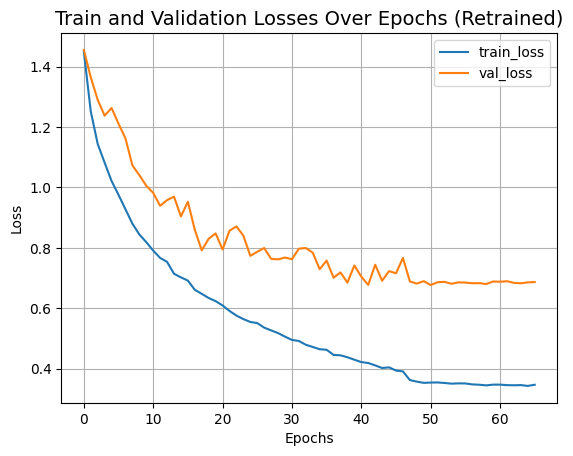

In [ ]:
#Retraining over 150 Epochs
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import shutil
from keras import backend as K
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Clear previous model from memory
K.clear_session()
tf.keras.backend.clear_session()

# ---------------------------
# Updated Hyperparameters
# ---------------------------
image_dimension = 256
patch_size = (16, 16)
dropout_rate = 0.2        # Increased dropout for better regularization
num_heads = 8
embed_dim = 256
num_mlp = 1024
qkv_bias = True
window_size = 8
shift_size = 4

input_shape = (image_dimension, image_dimension, 3)
num_patch_x = input_shape[0] // patch_size[0]  # 256/16 = 16
num_patch_y = input_shape[1] // patch_size[1]  # 256/16 = 16

learning_rate = 5e-5      # Lowered LR for more stable training
batch_size = 512          # Adjust if needed based on GPU memory
num_epochs = 150          # Increased to give the model more time to converge
weight_decay = 0.0001

# -------------------------------------------------------------------
# (1) Load and Prepare Your Dataset (Single-Task: X-ray Type Only)
# -------------------------------------------------------------------
# NOTE: Make sure train_df and valid_df are already loaded in the environment.

class PatchMerging(layers.Layer):
    def __init__(self, num_patch, embed_dim, **kwargs):
        # Accept **kwargs to handle "trainable" and other standard layer args
        super().__init__(**kwargs)
        self.num_patch = num_patch
        self.embed_dim = embed_dim
        self.linear_trans = layers.Dense(2 * embed_dim, use_bias=False)

    def call(self, x):
        height, width = self.num_patch
        _, _, C = x.shape
        x = tf.reshape(x, (-1, height, width, C))
        x0 = x[:, 0::2, 0::2, :]
        x1 = x[:, 1::2, 0::2, :]
        x2 = x[:, 0::2, 1::2, :]
        x3 = x[:, 1::2, 1::2, :]
        x = tf.concat([x0, x1, x2, x3], axis=-1)
        x = tf.reshape(x, (-1, (height // 2) * (width // 2), 4 * C))
        return self.linear_trans(x)

    def get_config(self):
        # Include any custom arguments in the config
        config = super().get_config()
        config.update({
            "num_patch": self.num_patch,
            "embed_dim": self.embed_dim,
        })
        return config


unique_types = sorted(train_df["type"].unique())
type_to_idx = {tp: i for i, tp in enumerate(unique_types)}
train_df["type_idx"] = train_df["type"].map(type_to_idx)
valid_df["type_idx"] = valid_df["type"].map(type_to_idx)
num_types = len(unique_types)
print("Unique x‑ray types:", unique_types)

def load_and_preprocess(image_path, xray_type):
    xray_type = tf.cast(xray_type, tf.int32)
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [image_dimension, image_dimension])
    image = tf.cast(image, tf.float32) / 255.0
    return image, xray_type

def augment(image):
    image = tf.image.random_flip_left_right(image)
    return image

# Create training dataset (with shuffling + augmentation)
train_ds = tf.data.Dataset.from_tensor_slices((train_df["image_path"].values,
                                               train_df["type_idx"].values))
# Shuffle BEFORE batching for stable epoch-to-epoch variability
train_ds = train_ds.shuffle(buffer_size=len(train_df), reshuffle_each_iteration=True)
train_ds = train_ds.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.map(lambda img, label: (augment(img), label),
                        num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.batch(batch_size)
train_ds = train_ds.map(lambda imgs, labels: (patch_extract(imgs), labels),
                        num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)

# Create validation dataset (no augmentation, no shuffle)
val_ds = tf.data.Dataset.from_tensor_slices((valid_df["image_path"].values,
                                             valid_df["type_idx"].values))
val_ds = val_ds.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.batch(batch_size)
val_ds = val_ds.map(lambda imgs, labels: (patch_extract(imgs), labels),
                    num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

# -------------------------------------------------------------------
# (2) Reload the Model from Your Checkpoint
# -------------------------------------------------------------------
# We'll need the same custom objects to load the model properly.
custom_objects = {
    "WindowAttention": WindowAttention,
    "SwinTransformer": SwinTransformer,
    "PatchEmbedding": PatchEmbedding,
    "PatchMerging": PatchMerging
}

checkpoint_path = "/content/newSwinTransformerTypeOnly.keras"
model = keras.models.load_model(checkpoint_path, custom_objects=custom_objects)
print("Loaded model from checkpoint:", checkpoint_path)

# (Optional) If you want to modify dropout in the loaded model layers, you’d have to rebuild.
# But here, we'll assume the loaded model already has the architecture you want.

# Re-compile with updated learning rate, if desired:
model.compile(
    optimizer=keras.optimizers.AdamW(learning_rate=learning_rate, weight_decay=weight_decay),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="accuracy")]
)

# -------------------------------------------------------------------
# (3) Train the Model for Additional Epochs
# -------------------------------------------------------------------
reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.1,
    patience=5,
    verbose=1,
    mode='max',
    min_delta=0.0001,
    cooldown=0,
    min_lr=1e-6  # You can lower the min_lr if you want more fine-tuning
)

# We'll create a new checkpoint path to avoid overwriting the old one.
new_checkpoint_path = "newSwinTransformerTypeOnly_Retrained.keras"

callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=15, mode='max',
                                  restore_best_weights=True),
    keras.callbacks.ModelCheckpoint(new_checkpoint_path, monitor='val_accuracy',
                                    save_best_only=True, mode='max', verbose=1),
    reduce_lr
]

history = model.fit(
    train_ds,
    epochs=num_epochs,       # 150 epochs
    validation_data=val_ds,
    callbacks=callbacks,
    verbose=1
)

# (Optional) Copy the best model checkpoint to Google Drive
shutil.copy(new_checkpoint_path,
            os.path.join('/content/drive/My Drive/mura_tuning/mura_xray_cnn/',
                         new_checkpoint_path))

# -------------------------------------------------------------------
# (4) Visualize Training Curves
# -------------------------------------------------------------------
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs (Retrained)", fontsize=14)
plt.legend()
plt.grid()
plt.show()


In [ ]:
#Second Training of Types
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import shutil
from keras import backend as K
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Clear previous model from memory
K.clear_session()
tf.keras.backend.clear_session()

# ---------------------------
# Hyperparameters for Retraining
# ---------------------------
learning_rate = 5e-6  # Lower LR for fine-tuning
num_epochs = 60       # Train for 60 more epochs
batch_size = 512      # Adjust if GPU memory is limited

# Increase augmentation intensity:
def augment(image):
    # Randomly flip horizontally
    image = tf.image.random_flip_left_right(image)
    # Randomly flip vertically
    image = tf.image.random_flip_up_down(image)
    # Randomly adjust brightness
    image = tf.image.random_brightness(image, max_delta=0.1)
    # Randomly adjust contrast
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1)
    return image
class PatchMerging(layers.Layer):
    def __init__(self, num_patch, embed_dim, **kwargs):
        # Accept **kwargs to handle "trainable" and other standard layer args
        super().__init__(**kwargs)
        self.num_patch = num_patch
        self.embed_dim = embed_dim
        self.linear_trans = layers.Dense(2 * embed_dim, use_bias=False)

    def call(self, x):
        height, width = self.num_patch
        _, _, C = x.shape
        x = tf.reshape(x, (-1, height, width, C))
        x0 = x[:, 0::2, 0::2, :]
        x1 = x[:, 1::2, 0::2, :]
        x2 = x[:, 0::2, 1::2, :]
        x3 = x[:, 1::2, 1::2, :]
        x = tf.concat([x0, x1, x2, x3], axis=-1)
        x = tf.reshape(x, (-1, (height // 2) * (width // 2), 4 * C))
        return self.linear_trans(x)

    def get_config(self):
        # Include any custom arguments in the config
        config = super().get_config()
        config.update({
            "num_patch": self.num_patch,
            "embed_dim": self.embed_dim,
        })
        return config

# ---------------------------
# Reload the Dataset with Stronger Augmentation
# ---------------------------
unique_types = sorted(train_df["type"].unique())
type_to_idx = {tp: i for i, tp in enumerate(unique_types)}
train_df["type_idx"] = train_df["type"].map(type_to_idx)
valid_df["type_idx"] = valid_df["type"].map(type_to_idx)
num_types = len(unique_types)
print("Unique x‑ray types:", unique_types)

def load_and_preprocess(image_path, xray_type):
    xray_type = tf.cast(xray_type, tf.int32)
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    # The resolution used before
    image = tf.image.resize(image, [256, 256])
    image = tf.cast(image, tf.float32) / 255.0
    return image, xray_type

# Create training dataset (with shuffling + stronger augmentation)
train_ds = tf.data.Dataset.from_tensor_slices((train_df["image_path"].values,
                                               train_df["type_idx"].values))
train_ds = train_ds.shuffle(buffer_size=len(train_df), reshuffle_each_iteration=True)
train_ds = train_ds.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.map(lambda img, label: (augment(img), label), num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.batch(batch_size)
train_ds = train_ds.map(lambda imgs, labels: (patch_extract(imgs), labels), num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)

# Create validation dataset (no augmentation, no shuffle)
val_ds = tf.data.Dataset.from_tensor_slices((valid_df["image_path"].values,
                                             valid_df["type_idx"].values))
val_ds = val_ds.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.batch(batch_size)
val_ds = val_ds.map(lambda imgs, labels: (patch_extract(imgs), labels), num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

# ---------------------------
# Reload Your Saved Model
# ---------------------------
# Make sure you have your custom layers imported: WindowAttention, SwinTransformer, PatchEmbedding, PatchMerging
custom_objects = {
    "WindowAttention": WindowAttention,
    "SwinTransformer": SwinTransformer,
    "PatchEmbedding": PatchEmbedding,
    "PatchMerging": PatchMerging
}

checkpoint_path = "/content/newSwinTransformerTypeOnly_Retrained.keras"
model = keras.models.load_model(checkpoint_path, custom_objects=custom_objects)
print("Loaded model from checkpoint:", checkpoint_path)

# Re-compile with a lower LR
model.compile(
    optimizer=keras.optimizers.AdamW(learning_rate=learning_rate, weight_decay=1e-4),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="accuracy")]
)

# ---------------------------
# Callbacks & Additional Training
# ---------------------------
reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.1,
    patience=4,
    verbose=1,
    mode='max',
    min_delta=0.0001,
    cooldown=0,
    min_lr=1e-8
)
new_checkpoint_path = "newSwinTransformerTypeOnly_StrongerAug.keras"
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, mode='max', restore_best_weights=True),
    keras.callbacks.ModelCheckpoint(new_checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1),
    reduce_lr
]

history = model.fit(
    train_ds,
    epochs=num_epochs,  # 60 more epochs
    validation_data=val_ds,
    callbacks=callbacks,
    verbose=1
)

# Copy the best model checkpoint to Google Drive (optional)
shutil.copy(new_checkpoint_path,
            os.path.join('/content/drive/My Drive/mura_tuning/mura_xray_cnn/', new_checkpoint_path))

# ---------------------------
# Plot the New Training Curves
# ---------------------------
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs (Retrained Again)", fontsize=14)
plt.legend()
plt.grid()
plt.show()


Unique x‑ray types: ['XR_ELBOW', 'XR_FINGER', 'XR_FOREARM', 'XR_HAND', 'XR_HUMERUS', 'XR_SHOULDER', 'XR_WRIST']


/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:393: UserWarning: `build()` was called on layer 'patch_embedding', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:393: UserWarning: `build()` was called on layer 'patch_merging', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Loaded model from checkpoint: /content/newSwinTransformerTypeOnly_Retrained.keras
Epoch 1/60
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 954ms/step - accuracy: 0.5179 - loss: 1.8550
Epoch 1: val_accuracy improved from -inf to 0.71817, saving model to newSwinTransformerTypeOnly_StrongerAug.keras
72/72 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.5182 - loss: 1.8510 - val_accuracy: 0.7182 - val_loss: 0.9327 - learning_rate: 5.0000e-06
Epoch 2/60
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 855ms/step - accuracy: 0.5772 - loss: 1.2227
Epoch 2: val_accuracy did not improve from 0.71817
72/72 ━━━━━━━━━━━━━━━━━━━━ 68s 931ms/step - accuracy: 0.5772 - loss: 1.2225 - val_accuracy: 0.7135 - val_loss: 0.9171 - learning_rate: 5.0000e-06
Epoch 3/60
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 848ms/step - accuracy: 0.5961 - loss: 1.1367
Epoch 3: val_accuracy did not improve from 0.71817
72/72 ━━━━━━━━━━━━━━━━━━━━ 67s 925ms/step - accuracy: 0.5961 - loss: 1.1366 - val_accuracy: 0.7160 - val_loss: 0.9058 - learning_rate: 5.0000e-06
Epoch 4/

KeyboardInterrupt: 

In [ ]:
#Retraining of 64% Accurate Abnormal / ~79% Accurate Type With More Agressive Cycler
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import shutil
from keras import backend as K

# ---------------------------
# Define the CyclicLR Callback
# ---------------------------
class CyclicLR(keras.callbacks.Callback):
    def __init__(self, base_lr=1e-5, max_lr=3e-3, step_size=2000, mode='exp_range', gamma=0.995):
        super().__init__()
        self.base_lr = base_lr
        self.max_lr = max_lr
        self.step_size = step_size
        self.mode = mode
        self.gamma = gamma
        self.lr_history = []
        self.iterations = 0

    def on_train_begin(self, logs=None):
        logs = logs or {}
        current_lr = self.model.optimizer.learning_rate
        # Ensure learning_rate is a tf.Variable
        if not isinstance(current_lr, tf.Variable):
            current_lr = tf.Variable(float(current_lr), trainable=False, dtype=tf.float32)
            self.model.optimizer.learning_rate = current_lr
        self.model.optimizer.learning_rate.assign(self.base_lr)

    def on_batch_end(self, batch, logs=None):
        logs = logs or {}
        self.iterations += 1
        new_lr = self._calculate_lr()
        self.model.optimizer.learning_rate.assign(new_lr)
        self.lr_history.append(new_lr)

    def _calculate_lr(self):
        cycle = np.floor(1 + self.iterations / (2 * self.step_size))
        x = np.abs(self.iterations / self.step_size - 2 * cycle + 1)
        if self.mode == 'triangular':
            scale = 1.0
        elif self.mode == 'triangular2':
            scale = 1.0 / (2.0 ** (cycle - 1))
        else:  # 'exp_range'
            scale = self.gamma ** (self.iterations % self.step_size)
        return self.base_lr + (self.max_lr - self.base_lr) * np.maximum(0, (1 - x)) * scale * 1.5

# Clear previous models from memory
K.clear_session()
tf.keras.backend.clear_session()

# ---------------------------------------------------
# Hyperparameters
# ---------------------------------------------------
image_dimension = 256
patch_size = (16, 16)
dropout_rate = 0.2      # Increased dropout for more regularization
num_heads = 8
embed_dim = 384         # Increased embedding dimension for richer representations
num_mlp = 1024
qkv_bias = True
window_size = 8
shift_size = 4

learning_rate_base = 1e-5
learning_rate_max = 5e-5
batch_size = 64
num_epochs = 60
weight_decay = 1e-4

num_patch_x = image_dimension // patch_size[0]  # 256/16 = 16
num_patch_y = image_dimension // patch_size[1]  # 256/16 = 16

# ---------------------------------------------------
# Define Helper Functions and Custom Layers
# ---------------------------------------------------
def window_partition(x, window_size):
    # x shape: (batch, height, width, channels)
    _, height, width, channels = x.shape
    patch_num_y = height // window_size
    patch_num_x = width // window_size
    x = tf.reshape(x, (-1, patch_num_y, window_size, patch_num_x, window_size, channels))
    x = tf.transpose(x, perm=(0, 1, 3, 2, 4, 5))
    windows = tf.reshape(x, (-1, window_size, window_size, channels))
    return windows

def window_reverse(windows, window_size, height, width, channels):
    patch_num_y = height // window_size
    patch_num_x = width // window_size
    x = tf.reshape(windows, (-1, patch_num_y, patch_num_x, window_size, window_size, channels))
    x = tf.transpose(x, perm=(0, 1, 3, 2, 4, 5))
    x = tf.reshape(x, (-1, height, width, channels))
    return x

class WindowAttention(layers.Layer):
    def __init__(self, dim, window_size, num_heads, qkv_bias=True, dropout_rate=0.0, **kwargs):
        super().__init__(**kwargs)
        self.dim = dim
        self.window_size = window_size  # (window_height, window_width)
        self.num_heads = num_heads
        self.scale = (dim // num_heads) ** -0.5
        self.qkv = layers.Dense(dim * 3, use_bias=qkv_bias)
        self.dropout = layers.Dropout(dropout_rate)
        self.proj = layers.Dense(dim)
        num_window_elements = (2 * self.window_size[0] - 1) * (2 * self.window_size[1] - 1)
        self.relative_position_bias_table = self.add_weight(
            shape=(num_window_elements, self.num_heads),
            initializer=keras.initializers.Zeros(),
            trainable=True,
            name="relative_position_bias_table"
        )
        coords_h = np.arange(self.window_size[0])
        coords_w = np.arange(self.window_size[1])
        coords = np.stack(np.meshgrid(coords_h, coords_w, indexing="ij"))
        coords_flatten = np.reshape(coords, (2, -1))
        relative_coords = coords_flatten[:, :, None] - coords_flatten[:, None, :]
        relative_coords = np.transpose(relative_coords, (1, 2, 0))
        relative_coords[:, :, 0] += self.window_size[0] - 1
        relative_coords[:, :, 1] += self.window_size[1] - 1
        relative_coords[:, :, 0] *= 2 * self.window_size[1] - 1
        relative_position_index = np.sum(relative_coords, axis=-1)
        self.relative_position_index = tf.Variable(
            initial_value=tf.convert_to_tensor(relative_position_index),
            trainable=False,
            name="relative_position_index"
        )

    def call(self, x, mask=None):
        _, size, channels = x.shape
        head_dim = channels // self.num_heads
        x_qkv = self.qkv(x)
        x_qkv = tf.reshape(x_qkv, (-1, size, 3, self.num_heads, head_dim))
        x_qkv = tf.transpose(x_qkv, perm=(2, 0, 3, 1, 4))
        q, k, v = x_qkv[0], x_qkv[1], x_qkv[2]
        q = q * self.scale
        k = tf.transpose(k, perm=(0, 1, 3, 2))
        attn = q @ k
        num_window_elements = self.window_size[0] * self.window_size[1]
        relative_position_index_flat = tf.reshape(self.relative_position_index, (-1,))
        relative_position_bias = tf.gather(self.relative_position_bias_table, relative_position_index_flat)
        relative_position_bias = tf.reshape(relative_position_bias, (num_window_elements, num_window_elements, -1))
        relative_position_bias = tf.transpose(relative_position_bias, perm=(2, 0, 1))
        attn = attn + tf.expand_dims(relative_position_bias, axis=0)
        if mask is not None:
            nW = mask.shape[0]
            mask_float = tf.cast(tf.expand_dims(tf.expand_dims(mask, axis=1), axis=0), tf.float32)
            attn = tf.reshape(attn, (-1, nW, self.num_heads, size, size)) + mask_float
            attn = tf.reshape(attn, (-1, self.num_heads, size, size))
            attn = keras.activations.softmax(attn, axis=-1)
        else:
            attn = keras.activations.softmax(attn, axis=-1)
        attn = self.dropout(attn)
        x_qkv = attn @ v
        x_qkv = tf.transpose(x_qkv, perm=(0, 2, 1, 3))
        x_qkv = tf.reshape(x_qkv, (-1, size, channels))
        x_qkv = self.proj(x_qkv)
        x_qkv = self.dropout(x_qkv)
        return x_qkv

class SwinTransformer(layers.Layer):
    def __init__(self, dim, num_patch, num_heads, window_size=7, shift_size=0,
                 num_mlp=1024, qkv_bias=True, dropout_rate=0.0, **kwargs):
        super().__init__(**kwargs)
        self.dim = dim
        self.num_patch = num_patch
        self.num_heads = num_heads
        self.window_size = window_size
        self.shift_size = shift_size
        self.num_mlp = num_mlp
        self.norm1 = layers.LayerNormalization(epsilon=1e-5)
        self.attn = WindowAttention(
            dim,
            window_size=(self.window_size, self.window_size),
            num_heads=num_heads,
            qkv_bias=qkv_bias,
            dropout_rate=dropout_rate,
        )
        self.drop_path = layers.Dropout(dropout_rate)
        self.norm2 = layers.LayerNormalization(epsilon=1e-5)
        self.mlp = keras.Sequential([
            layers.Dense(num_mlp),
            layers.Activation(keras.activations.gelu),
            layers.Dropout(dropout_rate),
            layers.Dense(dim),
            layers.Dropout(dropout_rate),
        ])
        if min(self.num_patch) < self.window_size:
            self.shift_size = 0
            self.window_size = min(self.num_patch)

    def build(self, input_shape):
        if self.shift_size == 0:
            self.attn_mask = None
        else:
            height, width = self.num_patch
            h_slices = (slice(0, -self.window_size),
                        slice(-self.window_size, -self.shift_size),
                        slice(-self.shift_size, None))
            w_slices = (slice(0, -self.window_size),
                        slice(-self.window_size, -self.shift_size),
                        slice(-self.shift_size, None))
            mask_array = np.zeros((1, height, width, 1))
            count = 0
            for h in h_slices:
                for w in w_slices:
                    mask_array[:, h, w, :] = count
                    count += 1
            mask_array = tf.convert_to_tensor(mask_array)
            mask_windows = window_partition(mask_array, self.window_size)
            mask_windows = tf.reshape(mask_windows, [-1, self.window_size * self.window_size])
            attn_mask = tf.expand_dims(mask_windows, axis=1) - tf.expand_dims(mask_windows, axis=2)
            attn_mask = tf.where(attn_mask != 0, -100.0, attn_mask)
            attn_mask = tf.where(attn_mask == 0, 0.0, attn_mask)
            self.attn_mask = tf.Variable(attn_mask, trainable=False)

    def call(self, x, training=False):
        height, width = self.num_patch
        x_skip = x
        x = self.norm1(x)
        x = tf.reshape(x, (-1, height, width, x.shape[-1]))
        if self.shift_size > 0:
            shifted_x = tf.roll(x, shift=[-self.shift_size, -self.shift_size], axis=[1, 2])
        else:
            shifted_x = x
        x_windows = window_partition(shifted_x, self.window_size)
        x_windows = tf.reshape(x_windows, (-1, self.window_size * self.window_size, x.shape[-1]))
        attn_windows = self.attn(x_windows, mask=self.attn_mask)
        attn_windows = tf.reshape(attn_windows, (-1, self.window_size, self.window_size, x.shape[-1]))
        shifted_x = window_reverse(attn_windows, self.window_size, height, width, x.shape[-1])
        if self.shift_size > 0:
            x = tf.roll(shifted_x, shift=[self.shift_size, self.shift_size], axis=[1, 2])
        else:
            x = shifted_x
        x = tf.reshape(x, (-1, height * width, x.shape[-1]))
        x = self.drop_path(x, training=training)
        x = x_skip + x
        x_skip = x
        x = self.norm2(x)
        x = self.mlp(x, training=training)
        x = self.drop_path(x, training=training)
        x = x_skip + x
        return x

def patch_extract(images):
    batch_size = tf.shape(images)[0]
    patches = tf.image.extract_patches(
        images=images,
        sizes=(1, patch_size[0], patch_size[1], 1),
        strides=(1, patch_size[0], patch_size[1], 1),
        rates=(1, 1, 1, 1),
        padding="VALID",
    )
    patch_dim = patches.shape[-1]
    patch_num = patches.shape[1]
    return tf.reshape(patches, (batch_size, patch_num * patch_num, patch_dim))

class PatchEmbedding(layers.Layer):
    def __init__(self, num_patch, embed_dim, **kwargs):
        super().__init__(**kwargs)
        self.num_patch = num_patch
        self.proj = layers.Dense(embed_dim)
        self.pos_embed = layers.Embedding(input_dim=num_patch, output_dim=embed_dim)
    def call(self, patch):
        pos = tf.range(start=0, limit=self.num_patch)
        return self.proj(patch) + self.pos_embed(pos)

class PatchMerging(layers.Layer):
    def __init__(self, num_patch, embed_dim, **kwargs):
        super().__init__(**kwargs)
        self.num_patch = num_patch
        self.embed_dim = embed_dim
        self.linear_trans = layers.Dense(2 * embed_dim, use_bias=False)
    def call(self, x):
        height, width = self.num_patch
        _, _, C = x.shape
        x = tf.reshape(x, (-1, height, width, C))
        x0 = x[:, 0::2, 0::2, :]
        x1 = x[:, 1::2, 0::2, :]
        x2 = x[:, 0::2, 1::2, :]
        x3 = x[:, 1::2, 1::2, :]
        x = tf.concat([x0, x1, x2, x3], axis=-1)
        x = tf.reshape(x, (-1, (height // 2) * (width // 2), 4 * C))
        return self.linear_trans(x)
    def get_config(self):
        config = super().get_config()
        config.update({
            "num_patch": self.num_patch,
            "embed_dim": self.embed_dim,
        })
        return config

custom_objects = {
    "WindowAttention": WindowAttention,
    "SwinTransformer": SwinTransformer,
    "PatchEmbedding": PatchEmbedding,
    "PatchMerging": PatchMerging
}

# ---------------------------------------------------------
# Build the Multi-Task Model with More Blocks & Larger Embed
# ---------------------------------------------------------
inputs = keras.Input(shape=(num_patch_x * num_patch_y, patch_size[0] * patch_size[1] * 3))
# Simple patch embedding via Dense layer
x = layers.Dense(embed_dim)(inputs)
# Add 4 Swin blocks (alternating shift=0 and shift=shift_size)
x = SwinTransformer(dim=embed_dim, num_patch=(num_patch_x, num_patch_y),
                    num_heads=num_heads, window_size=window_size, shift_size=0,
                    num_mlp=num_mlp, qkv_bias=qkv_bias, dropout_rate=dropout_rate)(x)
x = SwinTransformer(dim=embed_dim, num_patch=(num_patch_x, num_patch_y),
                    num_heads=num_heads, window_size=window_size, shift_size=shift_size,
                    num_mlp=num_mlp, qkv_bias=qkv_bias, dropout_rate=dropout_rate)(x)
x = SwinTransformer(dim=embed_dim, num_patch=(num_patch_x, num_patch_y),
                    num_heads=num_heads, window_size=window_size, shift_size=0,
                    num_mlp=num_mlp, qkv_bias=qkv_bias, dropout_rate=dropout_rate)(x)
x = SwinTransformer(dim=embed_dim, num_patch=(num_patch_x, num_patch_y),
                    num_heads=num_heads, window_size=window_size, shift_size=shift_size,
                    num_mlp=num_mlp, qkv_bias=qkv_bias, dropout_rate=dropout_rate)(x)

# Optional patch merging step
x = PatchMerging((num_patch_x, num_patch_y), embed_dim=embed_dim)(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(dropout_rate)(x)

# Branch for x-ray type classification
num_types = len(np.unique(train_df["type"]))
xray_branch = layers.Dense(128, activation='relu')(x)
xray_output = layers.Dense(num_types, activation='softmax', name='xray_type')(xray_branch)

# Branch for abnormal detection
abn_branch = layers.Dense(128, activation='relu')(x)
abnormal_output = layers.Dense(1, activation='sigmoid', name='abnormal')(abn_branch)

model_multitask = keras.Model(inputs, outputs=[xray_output, abnormal_output])
model_multitask.summary()

# ---------------------------------------------------------
# Load backbone weights from a type-only checkpoint
# ---------------------------------------------------------
checkpoint_path = "/content/drive/MyDrive/mura_tuning/mura_xray_cnn/newSwinTransformerMultiTaskCycLR.keras"
# Use load_weights with by_name=True and skip_mismatch=True so that only matching layers are loaded
model_multitask = keras.models.load_model(checkpoint_path, custom_objects=custom_objects)
print("Loaded backbone weights from checkpoint:", checkpoint_path)
# ---------------------------------------------------------
# Compile the Model with Multi-Task Losses and Loss Weights
# ---------------------------------------------------------
model_multitask.compile(
    optimizer=keras.optimizers.AdamW(learning_rate=learning_rate_base, weight_decay=weight_decay),
    loss={
        "xray_type": keras.losses.SparseCategoricalCrossentropy(),
        "abnormal": keras.losses.BinaryCrossentropy()
    },
    loss_weights={
        "xray_type": 0.3,
        "abnormal": 1.0
    },
    metrics={
        "xray_type": [keras.metrics.SparseCategoricalAccuracy(name="type_acc")],
        "abnormal": [keras.metrics.BinaryAccuracy(name="abn_acc")]
    }
)

# ---------------------------------------------------------
# Create the Multi-Task Datasets
# ---------------------------------------------------------
# Assume train_df and valid_df have columns: "image_path", "label" (0/1 for abnormal), "type" (string)
unique_types = train_df["type"].unique()
type_to_idx = {type_label: idx for idx, type_label in enumerate(unique_types)}

table = tf.lookup.StaticHashTable(
    initializer=tf.lookup.KeyValueTensorInitializer(
        keys=tf.constant(list(type_to_idx.keys()), dtype=tf.string),
        values=tf.constant(list(type_to_idx.values()), dtype=tf.int32)
    ),
    default_value=-1
)

def load_and_preprocess_multi(image_path, abnormal_label, type_label):
    # For abnormal label, cast directly.
    abnormal_label = tf.cast(abnormal_label, tf.int32)
    # For type label, use the lookup table if it is a string.
    if type_label.dtype == tf.string:
        type_label = table.lookup(type_label)
    else:
        type_label = tf.cast(type_label, tf.int32)
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [image_dimension, image_dimension])
    image = tf.cast(image, tf.float32) / 255.0
    return image, {"abnormal": abnormal_label, "xray_type": type_label}

def augment(image):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1)
    return image

def patch_extract_fn(images):
    b_size = tf.shape(images)[0]
    patches = tf.image.extract_patches(
        images=images,
        sizes=(1, patch_size[0], patch_size[1], 1),
        strides=(1, patch_size[0], patch_size[1], 1),
        rates=(1, 1, 1, 1),
        padding="VALID",
    )
    patch_dim = patches.shape[-1]
    patch_num = patches.shape[1]
    return tf.reshape(patches, (b_size, patch_num * patch_num, patch_dim))

# Build training dataset
train_multi_ds = tf.data.Dataset.from_tensor_slices((
    train_df["image_path"].values,
    train_df["label"].values,
    train_df["type"].values
))
train_multi_ds = train_multi_ds.shuffle(len(train_df), reshuffle_each_iteration=True)
train_multi_ds = train_multi_ds.map(load_and_preprocess_multi, num_parallel_calls=tf.data.AUTOTUNE)
train_multi_ds = train_multi_ds.map(lambda img, lbls: (augment(img), lbls), num_parallel_calls=tf.data.AUTOTUNE)
train_multi_ds = train_multi_ds.batch(batch_size)
train_multi_ds = train_multi_ds.map(lambda imgs, lbls: (patch_extract_fn(imgs), lbls), num_parallel_calls=tf.data.AUTOTUNE)
train_multi_ds = train_multi_ds.prefetch(tf.data.AUTOTUNE)

# Build validation dataset
val_multi_ds = tf.data.Data set.from_tensor_slices((
    valid_df["image_path"].values,
    valid_df["label"].values,
    valid_df["type"].values
))
val_multi_ds = val_multi_ds.map(load_and_preprocess_multi, num_parallel_calls=tf.data.AUTOTUNE)
val_multi_ds = val_multi_ds.batch(batch_size)
val_multi_ds = val_multi_ds.map(lambda imgs, lbls: (patch_extract_fn(imgs), lbls), num_parallel_calls=tf.data.AUTOTUNE)
val_multi_ds = val_multi_ds.prefetch(tf.data.AUTOTUNE)

# ---------------------------------------------------------
# Define Cyclical LR Callback
# ---------------------------------------------------------
cyc_lr = CyclicLR(
    base_lr=learning_rate_base,
    max_lr=learning_rate_max,
    step_size=2 * len(train_multi_ds),  # Approximately 2 epochs per cycle
    mode='triangular2'
)

# ---------------------------------------------------------
# Define Callbacks for Training
# ---------------------------------------------------------
checkpoint_path2 = "/content/newERSwinTransformerMultiTaskCycLR.keras"
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_abnormal_abn_acc', patience=10, mode='max', restore_best_weights=True
)
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    checkpoint_path2, monitor='val_abnormal_abn_acc', save_best_only=True, mode='max', verbose=1
)

# ---------------------------------------------------------
# Train the Multi-Task Model
# ---------------------------------------------------------
history = model_multitask.fit(
    train_multi_ds,
    epochs=num_epochs,
    validation_data=val_multi_ds,
    callbacks=[cyc_lr, early_stop, checkpoint_cb],
    verbose=1
)

# Optionally copy checkpoint to Drive
shutil.copy(checkpoint_path2, "/content/drive/MyDrive/mura_tuning/mura_xray_cnn/newERSwinTransformerMultiTaskCycLR.keras")

# ---------------------------------------------------------
# Plot the Loss Curves
# ---------------------------------------------------------
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs (Multi-Task + CLR)", fontsize=14)
plt.legend()
plt.grid()
plt.show()

# Plot separate branch losses
plt.plot(history.history["abnormal_loss"], label="abnormal_loss")
plt.plot(history.history["xray_type_loss"], label="type_loss")
plt.legend()
plt.show()

In [ ]:
#Retraining of 68% Accurate Abnormal / ~83% Accurate Type With More Agressive Cycler
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import shutil
from keras import backend as K

# ---------------------------
# Define the CyclicLR Callback
# ---------------------------
class CyclicLR(keras.callbacks.Callback):
    def __init__(self, base_lr=1e-5, max_lr=5e-5, step_size=1000, mode='triangular2_aggressive', gamma=0.995):
        """
        Parameters:
          base_lr: The minimum learning rate.
          max_lr: The maximum learning rate.
          step_size: Number of iterations for half a cycle.
          mode: One of {"triangular", "triangular2", "triangular2_aggressive"}.
                The new 'triangular2_aggressive' mode decays the amplitude more slowly.
          gamma: Used for 'exp_range' mode (not used in our new mode).
        """
        super().__init__()
        self.base_lr = base_lr
        self.max_lr = max_lr
        self.step_size = step_size
        self.mode = mode
        self.gamma = gamma
        self.lr_history = []
        self.iterations = 0

    def on_train_begin(self, logs=None):
        logs = logs or {}
        current_lr = self.model.optimizer.learning_rate
        if not isinstance(current_lr, tf.Variable):
            current_lr = tf.Variable(float(current_lr), trainable=False, dtype=tf.float32)
            self.model.optimizer.learning_rate = current_lr
        self.model.optimizer.learning_rate.assign(self.base_lr)

    def on_batch_end(self, batch, logs=None):
        logs = logs or {}
        self.iterations += 1
        new_lr = self._calculate_lr()
        self.model.optimizer.learning_rate.assign(new_lr)
        self.lr_history.append(new_lr)

    def _calculate_lr(self):
        cycle = np.floor(1 + self.iterations / (2 * self.step_size))
        x = np.abs(self.iterations / self.step_size - 2 * cycle + 1)
        if self.mode == 'triangular':
            scale = 1.0
        elif self.mode == 'triangular2':
            scale = 1.0 / (2.0 ** (cycle - 1))
        elif self.mode == 'triangular2_aggressive':
            # Use a decay factor of 1.5 instead of 2.0 for slower decay (more aggressive)
            scale = 1.0 / (1.5 ** (cycle - 1))
        else:
            scale = 1.0
        return self.base_lr + (self.max_lr - self.base_lr) * np.maximum(0, (1 - x)) * scale


# Clear previous models from memory
K.clear_session()
tf.keras.backend.clear_session()

# ---------------------------------------------------
# Hyperparameters
# ---------------------------------------------------
image_dimension = 256
patch_size = (16, 16)
dropout_rate = 0.2      # Increased dropout for more regularization
num_heads = 8
embed_dim = 384         # Increased embedding dimension for richer representations
num_mlp = 1024
qkv_bias = True
window_size = 8
shift_size = 4

learning_rate_base = 1e-6
learning_rate_max = 5e-3
batch_size = 64
num_epochs = 80
weight_decay = 1e-4

num_patch_x = image_dimension // patch_size[0]  # 256/16 = 16
num_patch_y = image_dimension // patch_size[1]  # 256/16 = 16

# ---------------------------------------------------
# Define Helper Functions and Custom Layers
# ---------------------------------------------------
def window_partition(x, window_size):
    # x shape: (batch, height, width, channels)
    _, height, width, channels = x.shape
    patch_num_y = height // window_size
    patch_num_x = width // window_size
    x = tf.reshape(x, (-1, patch_num_y, window_size, patch_num_x, window_size, channels))
    x = tf.transpose(x, perm=(0, 1, 3, 2, 4, 5))
    windows = tf.reshape(x, (-1, window_size, window_size, channels))
    return windows

def window_reverse(windows, window_size, height, width, channels):
    patch_num_y = height // window_size
    patch_num_x = width // window_size
    x = tf.reshape(windows, (-1, patch_num_y, patch_num_x, window_size, window_size, channels))
    x = tf.transpose(x, perm=(0, 1, 3, 2, 4, 5))
    x = tf.reshape(x, (-1, height, width, channels))
    return x

class WindowAttention(layers.Layer):
    def __init__(self, dim, window_size, num_heads, qkv_bias=True, dropout_rate=0.0, **kwargs):
        super().__init__(**kwargs)
        self.dim = dim
        self.window_size = window_size  # (window_height, window_width)
        self.num_heads = num_heads
        self.scale = (dim // num_heads) ** -0.5
        self.qkv = layers.Dense(dim * 3, use_bias=qkv_bias)
        self.dropout = layers.Dropout(dropout_rate)
        self.proj = layers.Dense(dim)
        num_window_elements = (2 * self.window_size[0] - 1) * (2 * self.window_size[1] - 1)
        self.relative_position_bias_table = self.add_weight(
            shape=(num_window_elements, self.num_heads),
            initializer=keras.initializers.Zeros(),
            trainable=True,
            name="relative_position_bias_table"
        )
        coords_h = np.arange(self.window_size[0])
        coords_w = np.arange(self.window_size[1])
        coords = np.stack(np.meshgrid(coords_h, coords_w, indexing="ij"))
        coords_flatten = np.reshape(coords, (2, -1))
        relative_coords = coords_flatten[:, :, None] - coords_flatten[:, None, :]
        relative_coords = np.transpose(relative_coords, (1, 2, 0))
        relative_coords[:, :, 0] += self.window_size[0] - 1
        relative_coords[:, :, 1] += self.window_size[1] - 1
        relative_coords[:, :, 0] *= 2 * self.window_size[1] - 1
        relative_position_index = np.sum(relative_coords, axis=-1)
        self.relative_position_index = tf.Variable(
            initial_value=tf.convert_to_tensor(relative_position_index),
            trainable=False,
            name="relative_position_index"
        )

    def call(self, x, mask=None):
        _, size, channels = x.shape
        head_dim = channels // self.num_heads
        x_qkv = self.qkv(x)
        x_qkv = tf.reshape(x_qkv, (-1, size, 3, self.num_heads, head_dim))
        x_qkv = tf.transpose(x_qkv, perm=(2, 0, 3, 1, 4))
        q, k, v = x_qkv[0], x_qkv[1], x_qkv[2]
        q = q * self.scale
        k = tf.transpose(k, perm=(0, 1, 3, 2))
        attn = q @ k
        num_window_elements = self.window_size[0] * self.window_size[1]
        relative_position_index_flat = tf.reshape(self.relative_position_index, (-1,))
        relative_position_bias = tf.gather(self.relative_position_bias_table, relative_position_index_flat)
        relative_position_bias = tf.reshape(relative_position_bias, (num_window_elements, num_window_elements, -1))
        relative_position_bias = tf.transpose(relative_position_bias, perm=(2, 0, 1))
        attn = attn + tf.expand_dims(relative_position_bias, axis=0)
        if mask is not None:
            nW = mask.shape[0]
            mask_float = tf.cast(tf.expand_dims(tf.expand_dims(mask, axis=1), axis=0), tf.float32)
            attn = tf.reshape(attn, (-1, nW, self.num_heads, size, size)) + mask_float
            attn = tf.reshape(attn, (-1, self.num_heads, size, size))
            attn = keras.activations.softmax(attn, axis=-1)
        else:
            attn = keras.activations.softmax(attn, axis=-1)
        attn = self.dropout(attn)
        x_qkv = attn @ v
        x_qkv = tf.transpose(x_qkv, perm=(0, 2, 1, 3))
        x_qkv = tf.reshape(x_qkv, (-1, size, channels))
        x_qkv = self.proj(x_qkv)
        x_qkv = self.dropout(x_qkv)
        return x_qkv

class SwinTransformer(layers.Layer):
    def __init__(self, dim, num_patch, num_heads, window_size=7, shift_size=0,
                 num_mlp=1024, qkv_bias=True, dropout_rate=0.0, **kwargs):
        super().__init__(**kwargs)
        self.dim = dim
        self.num_patch = num_patch
        self.num_heads = num_heads
        self.window_size = window_size
        self.shift_size = shift_size
        self.num_mlp = num_mlp
        self.norm1 = layers.LayerNormalization(epsilon=1e-5)
        self.attn = WindowAttention(
            dim,
            window_size=(self.window_size, self.window_size),
            num_heads=num_heads,
            qkv_bias=qkv_bias,
            dropout_rate=dropout_rate,
        )
        self.drop_path = layers.Dropout(dropout_rate)
        self.norm2 = layers.LayerNormalization(epsilon=1e-5)
        self.mlp = keras.Sequential([
            layers.Dense(num_mlp),
            layers.Activation(keras.activations.gelu),
            layers.Dropout(dropout_rate),
            layers.Dense(dim),
            layers.Dropout(dropout_rate),
        ])
        if min(self.num_patch) < self.window_size:
            self.shift_size = 0
            self.window_size = min(self.num_patch)

    def build(self, input_shape):
        if self.shift_size == 0:
            self.attn_mask = None
        else:
            height, width = self.num_patch
            h_slices = (slice(0, -self.window_size),
                        slice(-self.window_size, -self.shift_size),
                        slice(-self.shift_size, None))
            w_slices = (slice(0, -self.window_size),
                        slice(-self.window_size, -self.shift_size),
                        slice(-self.shift_size, None))
            mask_array = np.zeros((1, height, width, 1))
            count = 0
            for h in h_slices:
                for w in w_slices:
                    mask_array[:, h, w, :] = count
                    count += 1
            mask_array = tf.convert_to_tensor(mask_array)
            mask_windows = window_partition(mask_array, self.window_size)
            mask_windows = tf.reshape(mask_windows, [-1, self.window_size * self.window_size])
            attn_mask = tf.expand_dims(mask_windows, axis=1) - tf.expand_dims(mask_windows, axis=2)
            attn_mask = tf.where(attn_mask != 0, -100.0, attn_mask)
            attn_mask = tf.where(attn_mask == 0, 0.0, attn_mask)
            self.attn_mask = tf.Variable(attn_mask, trainable=False)

    def call(self, x, training=False):
        height, width = self.num_patch
        x_skip = x
        x = self.norm1(x)
        x = tf.reshape(x, (-1, height, width, x.shape[-1]))
        if self.shift_size > 0:
            shifted_x = tf.roll(x, shift=[-self.shift_size, -self.shift_size], axis=[1, 2])
        else:
            shifted_x = x
        x_windows = window_partition(shifted_x, self.window_size)
        x_windows = tf.reshape(x_windows, (-1, self.window_size * self.window_size, x.shape[-1]))
        attn_windows = self.attn(x_windows, mask=self.attn_mask)
        attn_windows = tf.reshape(attn_windows, (-1, self.window_size, self.window_size, x.shape[-1]))
        shifted_x = window_reverse(attn_windows, self.window_size, height, width, x.shape[-1])
        if self.shift_size > 0:
            x = tf.roll(shifted_x, shift=[self.shift_size, self.shift_size], axis=[1, 2])
        else:
            x = shifted_x
        x = tf.reshape(x, (-1, height * width, x.shape[-1]))
        x = self.drop_path(x, training=training)
        x = x_skip + x
        x_skip = x
        x = self.norm2(x)
        x = self.mlp(x, training=training)
        x = self.drop_path(x, training=training)
        x = x_skip + x
        return x

def patch_extract(images):
    batch_size = tf.shape(images)[0]
    patches = tf.image.extract_patches(
        images=images,
        sizes=(1, patch_size[0], patch_size[1], 1),
        strides=(1, patch_size[0], patch_size[1], 1),
        rates=(1, 1, 1, 1),
        padding="VALID",
    )
    patch_dim = patches.shape[-1]
    patch_num = patches.shape[1]
    return tf.reshape(patches, (batch_size, patch_num * patch_num, patch_dim))

class PatchEmbedding(layers.Layer):
    def __init__(self, num_patch, embed_dim, **kwargs):
        super().__init__(**kwargs)
        self.num_patch = num_patch
        self.proj = layers.Dense(embed_dim)
        self.pos_embed = layers.Embedding(input_dim=num_patch, output_dim=embed_dim)
    def call(self, patch):
        pos = tf.range(start=0, limit=self.num_patch)
        return self.proj(patch) + self.pos_embed(pos)

class PatchMerging(layers.Layer):
    def __init__(self, num_patch, embed_dim, **kwargs):
        super().__init__(**kwargs)
        self.num_patch = num_patch
        self.embed_dim = embed_dim
        self.linear_trans = layers.Dense(2 * embed_dim, use_bias=False)
    def call(self, x):
        height, width = self.num_patch
        _, _, C = x.shape
        x = tf.reshape(x, (-1, height, width, C))
        x0 = x[:, 0::2, 0::2, :]
        x1 = x[:, 1::2, 0::2, :]
        x2 = x[:, 0::2, 1::2, :]
        x3 = x[:, 1::2, 1::2, :]
        x = tf.concat([x0, x1, x2, x3], axis=-1)
        x = tf.reshape(x, (-1, (height // 2) * (width // 2), 4 * C))
        return self.linear_trans(x)
    def get_config(self):
        config = super().get_config()
        config.update({
            "num_patch": self.num_patch,
            "embed_dim": self.embed_dim,
        })
        return config

custom_objects = {
    "WindowAttention": WindowAttention,
    "SwinTransformer": SwinTransformer,
    "PatchEmbedding": PatchEmbedding,
    "PatchMerging": PatchMerging
}

# ---------------------------------------------------------
# Build the Multi-Task Model with More Blocks & Larger Embed
# ---------------------------------------------------------
inputs = keras.Input(shape=(num_patch_x * num_patch_y, patch_size[0] * patch_size[1] * 3))
# Simple patch embedding via Dense layer
x = layers.Dense(embed_dim)(inputs)
# Add 4 Swin blocks (alternating shift=0 and shift=shift_size)
x = SwinTransformer(dim=embed_dim, num_patch=(num_patch_x, num_patch_y),
                    num_heads=num_heads, window_size=window_size, shift_size=0,
                    num_mlp=num_mlp, qkv_bias=qkv_bias, dropout_rate=dropout_rate)(x)
x = SwinTransformer(dim=embed_dim, num_patch=(num_patch_x, num_patch_y),
                    num_heads=num_heads, window_size=window_size, shift_size=shift_size,
                    num_mlp=num_mlp, qkv_bias=qkv_bias, dropout_rate=dropout_rate)(x)
x = SwinTransformer(dim=embed_dim, num_patch=(num_patch_x, num_patch_y),
                    num_heads=num_heads, window_size=window_size, shift_size=0,
                    num_mlp=num_mlp, qkv_bias=qkv_bias, dropout_rate=dropout_rate)(x)
x = SwinTransformer(dim=embed_dim, num_patch=(num_patch_x, num_patch_y),
                    num_heads=num_heads, window_size=window_size, shift_size=shift_size,
                    num_mlp=num_mlp, qkv_bias=qkv_bias, dropout_rate=dropout_rate)(x)

# Optional patch merging step
x = PatchMerging((num_patch_x, num_patch_y), embed_dim=embed_dim)(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(dropout_rate)(x)

# Branch for x-ray type classification
num_types = len(np.unique(train_df["type"]))
xray_branch = layers.Dense(128, activation='relu')(x)
xray_output = layers.Dense(num_types, activation='softmax', name='xray_type')(xray_branch)

# Branch for abnormal detection
abn_branch = layers.Dense(128, activation='relu')(x)
abnormal_output = layers.Dense(1, activation='sigmoid', name='abnormal')(abn_branch)

model_multitask = keras.Model(inputs, outputs=[abnormal_output, xray_output])

checkpoint_path = "/content/drive/MyDrive/mura_tuning/mura_xray_cnn/newERSwinTransformerMultiTaskCycLR.keras"
# Use load_weights with by_name=True and skip_mismatch=True so that only matching layers are loaded
model_multitask = keras.models.load_model(checkpoint_path, custom_objects=custom_objects)
print("Loaded backbone weights from checkpoint:", checkpoint_path)

# checkpoint_path = "/content/drive/MyDrive/mura_tuning/mura_xray_cnn/newERSwinTransformerMultiTaskCycLR.keras"
# # Use load_weights with by_name=True and skip_mismatch=True so that only matching layers are loaded
# model_multitask = keras.models.load_model(checkpoint_path, custom_objects=custom_objects)
# print("Loaded backbone weights from checkpoint:", checkpoint_path)

model_multitask.summary()

# ---------------------------------------------------------
# Load backbone weights from a type-only checkpoint
# ---------------------------------------------------------

# ---------------------------------------------------------
# Compile the Model with Multi-Task Losses and Loss Weights
# ---------------------------------------------------------
model_multitask.compile(
    optimizer=keras.optimizers.AdamW(learning_rate=learning_rate_base, weight_decay=weight_decay),
    loss={
        "xray_type": keras.losses.SparseCategoricalCrossentropy(),
        "abnormal": keras.losses.BinaryCrossentropy()
    },
    loss_weights={
        "xray_type": 0.3,
        "abnormal": 1.0
    },
    metrics={
        "xray_type": [keras.metrics.SparseCategoricalAccuracy(name="type_acc")],
        "abnormal": [keras.metrics.BinaryAccuracy(name="abn_acc")]
    }
)

# ---------------------------------------------------------
# Create the Multi-Task Datasets
# ---------------------------------------------------------
# Assume train_df and valid_df have columns: "image_path", "label" (0/1 for abnormal), "type" (string)
unique_types = train_df["type"].unique()
type_to_idx = {type_label: idx for idx, type_label in enumerate(unique_types)}

table = tf.lookup.StaticHashTable(
    initializer=tf.lookup.KeyValueTensorInitializer(
        keys=tf.constant(list(type_to_idx.keys()), dtype=tf.string),
        values=tf.constant(list(type_to_idx.values()), dtype=tf.int32)
    ),
    default_value=-1
)

def load_and_preprocess_multi(image_path, abnormal_label, type_label):
    # For abnormal label, cast directly.
    abnormal_label = tf.cast(abnormal_label, tf.int32)
    # For type label, use the lookup table if it is a string.
    if type_label.dtype == tf.string:
        type_label = table.lookup(type_label)
    else:
        type_label = tf.cast(type_label, tf.int32)
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [image_dimension, image_dimension])
    image = tf.cast(image, tf.float32) / 255.0
    return image, {"abnormal": abnormal_label, "xray_type": type_label}

def augment(image):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1)
    return image

def patch_extract_fn(images):
    b_size = tf.shape(images)[0]
    patches = tf.image.extract_patches(
        images=images,
        sizes=(1, patch_size[0], patch_size[1], 1),
        strides=(1, patch_size[0], patch_size[1], 1),
        rates=(1, 1, 1, 1),
        padding="VALID",
    )
    patch_dim = patches.shape[-1]
    patch_num = patches.shape[1]
    return tf.reshape(patches, (b_size, patch_num * patch_num, patch_dim))

# Build training dataset
train_multi_ds = tf.data.Dataset.from_tensor_slices((
    train_df["image_path"].values,
    train_df["label"].values,
    train_df["type"].values
))
train_multi_ds = train_multi_ds.shuffle(len(train_df), reshuffle_each_iteration=True)
train_multi_ds = train_multi_ds.map(load_and_preprocess_multi, num_parallel_calls=tf.data.AUTOTUNE)
train_multi_ds = train_multi_ds.map(lambda img, lbls: (augment(img), lbls), num_parallel_calls=tf.data.AUTOTUNE)
train_multi_ds = train_multi_ds.batch(batch_size)
train_multi_ds = train_multi_ds.map(lambda imgs, lbls: (patch_extract_fn(imgs), lbls), num_parallel_calls=tf.data.AUTOTUNE)
train_multi_ds = train_multi_ds.prefetch(tf.data.AUTOTUNE)

# Build validation dataset
val_multi_ds = tf.data.Dataset.from_tensor_slices((
    valid_df["image_path"].values,
    valid_df["label"].values,
    valid_df["type"].values
))
val_multi_ds = val_multi_ds.map(load_and_preprocess_multi, num_parallel_calls=tf.data.AUTOTUNE)
val_multi_ds = val_multi_ds.batch(batch_size)
val_multi_ds = val_multi_ds.map(lambda imgs, lbls: (patch_extract_fn(imgs), lbls), num_parallel_calls=tf.data.AUTOTUNE)
val_multi_ds = val_multi_ds.prefetch(tf.data.AUTOTUNE)

# ---------------------------------------------------------
# Define Cyclical LR Callback
# ---------------------------------------------------------
cyc_lr = CyclicLR(
    base_lr=learning_rate_base,
    max_lr=learning_rate_max,
    step_size=2 * len(train_multi_ds),  # Approximately 2 epochs per cycle
    mode='triangular2_aggressive'
)

# ---------------------------------------------------------
# Define Callbacks for Training
# ---------------------------------------------------------
checkpoint_path2 = "/content/newERESTSwinTransformerMultiTaskCycLR.keras"
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_abnormal_abn_acc', patience=13, mode='max', restore_best_weights=True
)
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    checkpoint_path2, monitor='val_abnormal_abn_acc', save_best_only=True, mode='max', verbose=1
)

# ---------------------------------------------------------
# Train the Multi-Task Model
# ---------------------------------------------------------
history = model_multitask.fit(
    train_multi_ds,
    epochs=num_epochs,
    validation_data=val_multi_ds,
    callbacks=[cyc_lr, early_stop, checkpoint_cb],
    verbose=1
)

# Optionally copy checkpoint to Drive
shutil.copy(checkpoint_path2, "/content/drive/MyDrive/mura_tuning/mura_xray_cnn/newERESTSwinTransformerMultiTaskCycLR.keras")

# ---------------------------------------------------------
# Plot the Loss Curves
# ---------------------------------------------------------
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs (Multi-Task + CLR)", fontsize=14)
plt.legend()
plt.grid()
plt.show()

# Plot separate branch losses
plt.plot(history.history["abnormal_loss"], label="abnormal_loss")
plt.plot(history.history["xray_type_loss"], label="type_loss")
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:393: UserWarning: `build()` was called on layer 'patch_merging', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Loaded backbone weights from checkpoint: /content/drive/MyDrive/mura_tuning/mura_xray_cnn/newERSwinTransformerMultiTaskCycLR.keras


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 768)       │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 256, 384)       │        295,296 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ swin_transformer          │ (None, 256, 384)       │      1,382,536 │ dense[0][0]            │
│ (SwinTransformer)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ swin_transformer_1        │ (None, 256, 384)       │      1,382,536 │ swin_transformer[0][0] │
│ (SwinTransformer)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ swin_transformer_2        │ (None, 256, 384)       │      1,382,536 │ swin_transformer_1[0]… │
│ (SwinTransformer)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ swin_transformer_3        │ (None, 256, 384)       │      1,382,536 │ swin_transformer_2[0]… │
│ (SwinTransformer)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ patch_merging             │ (None, 64, 768)        │      1,179,648 │ swin_transformer_3[0]… │
│ (PatchMerging)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d  │ (None, 768)            │              0 │ patch_merging[0][0]    │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_16 (Dropout)      │ (None, 768)            │              0 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_18 (Dense)          │ (None, 128)            │         98,432 │ dropout_16[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_19 (Dense)          │ (None, 128)            │         98,432 │ dropout_16[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ xray_type (Dense)         │ (None, 7)              │            903 │ dense_18[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ abnormal (Dense)          │ (None, 1)              │            129 │ dense_19[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 21,608,954 (82.43 MB)

 Trainable params: 7,202,984 (27.48 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,405,970 (54.95 MB)

Epoch 1/80


In [ ]:
#Enlargened Model Initial Type Training 150 epochs
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import shutil
from keras import backend as K

# ---------------------------
# CyclicLR Callback Definition (optional)
# You can remove this callback if you prefer a fixed LR schedule.
# ---------------------------
class CyclicLR(keras.callbacks.Callback):
    def __init__(self, base_lr=1e-5, max_lr=5e-5, step_size=2000, mode='triangular2', gamma=0.995):
        super().__init__()
        self.base_lr = base_lr
        self.max_lr = max_lr
        self.step_size = step_size
        self.mode = mode
        self.gamma = gamma
        self.lr_history = []
        self.iterations = 0

    def on_train_begin(self, logs=None):
        logs = logs or {}
        current_lr = self.model.optimizer.learning_rate
        if not isinstance(current_lr, tf.Variable):
            current_lr = tf.Variable(float(current_lr), trainable=False, dtype=tf.float32)
            self.model.optimizer.learning_rate = current_lr
        self.model.optimizer.learning_rate.assign(self.base_lr)

    def on_batch_end(self, batch, logs=None):
        logs = logs or {}
        self.iterations += 1
        new_lr = self._calculate_lr()
        self.model.optimizer.learning_rate.assign(new_lr)
        self.lr_history.append(new_lr)

    def _calculate_lr(self):
        cycle = np.floor(1 + self.iterations / (2 * self.step_size))
        x = np.abs(self.iterations / self.step_size - 2 * cycle + 1)
        if self.mode == 'triangular':
            scale = 1.0
        elif self.mode == 'triangular2':
            scale = 1.0 / (2.0 ** (cycle - 1))
        else:
            scale = 1.0
        return self.base_lr + (self.max_lr - self.base_lr) * np.maximum(0, (1 - x)) * scale

# Clear previous session
K.clear_session()
tf.keras.backend.clear_session()

# ---------------------------------------------------
# Hyperparameters
# ---------------------------------------------------
image_dimension = 256
# We'll use a ResNet stem so our effective feature map size is lower.
stem_filters = 64
patch_size = (4, 4)  # Extract patches from the stem output.
dropout_rate = 0.2
num_heads = 8
embed_dim = 384         # Increased embedding dimension
num_mlp = 1024
qkv_bias = True
window_size = 8
shift_size = 4

# After the stem, suppose our feature map is (64, 64, stem_filters).
# With patch size (4,4), number of patches per dim: 64/4 = 16 => total 256 patches.
num_patch_x = 16
num_patch_y = 16

learning_rate = 5e-5      # Use a lower LR for fine-tuning
batch_size = 256          # Adjust based on your GPU memory
num_epochs = 150
weight_decay = 1e-4

# ---------------------------------------------------
# Define Helper Functions and Custom Layers
# ---------------------------------------------------
def window_partition(x, window_size):
    _, height, width, channels = x.shape
    patch_num_y = height // window_size
    patch_num_x = width // window_size
    x = tf.reshape(x, (-1, patch_num_y, window_size, patch_num_x, window_size, channels))
    x = tf.transpose(x, perm=(0, 1, 3, 2, 4, 5))
    windows = tf.reshape(x, (-1, window_size, window_size, channels))
    return windows

def window_reverse(windows, window_size, height, width, channels):
    patch_num_y = height // window_size
    patch_num_x = width // window_size
    x = tf.reshape(windows, (-1, patch_num_y, patch_num_x, window_size, window_size, channels))
    x = tf.transpose(x, perm=(0, 1, 3, 2, 4, 5))
    x = tf.reshape(x, (-1, height, width, channels))
    return x

class WindowAttention(layers.Layer):
    def __init__(self, dim, window_size, num_heads, qkv_bias=True, dropout_rate=0.0, **kwargs):
        super().__init__(**kwargs)
        self.dim = dim
        self.window_size = window_size
        self.num_heads = num_heads
        self.scale = (dim // num_heads) ** -0.5
        self.qkv = layers.Dense(dim * 3, use_bias=qkv_bias)
        self.dropout = layers.Dropout(dropout_rate)
        self.proj = layers.Dense(dim)
        num_window_elements = (2 * self.window_size[0] - 1) * (2 * self.window_size[1] - 1)
        self.relative_position_bias_table = self.add_weight(
            shape=(num_window_elements, self.num_heads),
            initializer=keras.initializers.Zeros(),
            trainable=True,
            name="relative_position_bias_table"
        )
        coords_h = np.arange(self.window_size[0])
        coords_w = np.arange(self.window_size[1])
        coords = np.stack(np.meshgrid(coords_h, coords_w, indexing="ij"))
        coords_flatten = np.reshape(coords, (2, -1))
        relative_coords = coords_flatten[:, :, None] - coords_flatten[:, None, :]
        relative_coords = np.transpose(relative_coords, (1, 2, 0))
        relative_coords[:, :, 0] += self.window_size[0] - 1
        relative_coords[:, :, 1] += self.window_size[1] - 1
        relative_coords[:, :, 0] *= 2 * self.window_size[1] - 1
        relative_position_index = np.sum(relative_coords, axis=-1)
        self.relative_position_index = tf.Variable(
            initial_value=tf.convert_to_tensor(relative_position_index),
            trainable=False,
            name="relative_position_index"
        )

    def call(self, x, mask=None):
        _, size, channels = x.shape
        head_dim = channels // self.num_heads
        x_qkv = self.qkv(x)
        x_qkv = tf.reshape(x_qkv, (-1, size, 3, self.num_heads, head_dim))
        x_qkv = tf.transpose(x_qkv, perm=(2, 0, 3, 1, 4))
        q, k, v = x_qkv[0], x_qkv[1], x_qkv[2]
        q = q * self.scale
        k = tf.transpose(k, perm=(0, 1, 3, 2))
        attn = q @ k
        num_window_elements = self.window_size[0] * self.window_size[1]
        relative_position_index_flat = tf.reshape(self.relative_position_index, (-1,))
        relative_position_bias = tf.gather(self.relative_position_bias_table, relative_position_index_flat)
        relative_position_bias = tf.reshape(relative_position_bias, (num_window_elements, num_window_elements, -1))
        relative_position_bias = tf.transpose(relative_position_bias, perm=(2, 0, 1))
        attn = attn + tf.expand_dims(relative_position_bias, axis=0)
        if mask is not None:
            nW = mask.shape[0]
            mask_float = tf.cast(tf.expand_dims(tf.expand_dims(mask, axis=1), axis=0), tf.float32)
            attn = tf.reshape(attn, (-1, nW, self.num_heads, size, size)) + mask_float
            attn = tf.reshape(attn, (-1, self.num_heads, size, size))
            attn = keras.activations.softmax(attn, axis=-1)
        else:
            attn = keras.activations.softmax(attn, axis=-1)
        attn = self.dropout(attn)
        x_qkv = attn @ v
        x_qkv = tf.transpose(x_qkv, perm=(0, 2, 1, 3))
        x_qkv = tf.reshape(x_qkv, (-1, size, channels))
        x_qkv = self.proj(x_qkv)
        x_qkv = self.dropout(x_qkv)
        return x_qkv

class SwinTransformer(layers.Layer):
    def __init__(self, dim, num_patch, num_heads, window_size=7, shift_size=0,
                 num_mlp=1024, qkv_bias=True, dropout_rate=0.0, **kwargs):
        super().__init__(**kwargs)
        self.dim = dim
        self.num_patch = num_patch
        self.num_heads = num_heads
        self.window_size = window_size
        self.shift_size = shift_size
        self.num_mlp = num_mlp
        self.norm1 = layers.LayerNormalization(epsilon=1e-5)
        self.attn = WindowAttention(
            dim,
            window_size=(self.window_size, self.window_size),
            num_heads=num_heads,
            qkv_bias=qkv_bias,
            dropout_rate=dropout_rate,
        )
        self.drop_path = layers.Dropout(dropout_rate)
        self.norm2 = layers.LayerNormalization(epsilon=1e-5)
        self.mlp = keras.Sequential([
            layers.Dense(num_mlp),
            layers.Activation(keras.activations.gelu),
            layers.Dropout(dropout_rate),
            layers.Dense(dim),
            layers.Dropout(dropout_rate),
        ])
        if min(self.num_patch) < self.window_size:
            self.shift_size = 0
            self.window_size = min(self.num_patch)

    def build(self, input_shape):
        if self.shift_size == 0:
            self.attn_mask = None
        else:
            height, width = self.num_patch
            h_slices = (slice(0, -self.window_size),
                        slice(-self.window_size, -self.shift_size),
                        slice(-self.shift_size, None))
            w_slices = (slice(0, -self.window_size),
                        slice(-self.window_size, -self.shift_size),
                        slice(-self.shift_size, None))
            mask_array = np.zeros((1, height, width, 1))
            count = 0
            for h in h_slices:
                for w in w_slices:
                    mask_array[:, h, w, :] = count
                    count += 1
            mask_array = tf.convert_to_tensor(mask_array)
            mask_windows = window_partition(mask_array, self.window_size)
            mask_windows = tf.reshape(mask_windows, [-1, self.window_size * self.window_size])
            attn_mask = tf.expand_dims(mask_windows, axis=1) - tf.expand_dims(mask_windows, axis=2)
            attn_mask = tf.where(attn_mask != 0, -100.0, attn_mask)
            attn_mask = tf.where(attn_mask == 0, 0.0, attn_mask)
            self.attn_mask = tf.Variable(attn_mask, trainable=False)

    def call(self, x, training=False):
        height, width = self.num_patch
        x_skip = x
        x = self.norm1(x)
        x = tf.reshape(x, (-1, height, width, x.shape[-1]))
        if self.shift_size > 0:
            shifted_x = tf.roll(x, shift=[-self.shift_size, -self.shift_size], axis=[1, 2])
        else:
            shifted_x = x
        x_windows = window_partition(shifted_x, self.window_size)
        x_windows = tf.reshape(x_windows, (-1, self.window_size * self.window_size, x.shape[-1]))
        attn_windows = self.attn(x_windows, mask=self.attn_mask)
        attn_windows = tf.reshape(attn_windows, (-1, self.window_size, self.window_size, x.shape[-1]))
        shifted_x = window_reverse(attn_windows, self.window_size, height, width, x.shape[-1])
        if self.shift_size > 0:
            x = tf.roll(shifted_x, shift=[self.shift_size, self.shift_size], axis=[1, 2])
        else:
            x = shifted_x
        x = tf.reshape(x, (-1, height * width, x.shape[-1]))
        x = self.drop_path(x, training=training)
        x = x_skip + x
        x_skip = x
        x = self.norm2(x)
        x = self.mlp(x, training=training)
        x = self.drop_path(x, training=training)
        x = x_skip + x
        return x

def patch_extract(images):
    batch_size = tf.shape(images)[0]
    patches = tf.image.extract_patches(
        images=images,
        sizes=(1, patch_size[0], patch_size[1], 1),
        strides=(1, patch_size[0], patch_size[1], 1),
        rates=(1, 1, 1, 1),
        padding="VALID",
    )
    patch_dim = patches.shape[-1]
    patch_num = patches.shape[1]
    return tf.reshape(patches, (batch_size, patch_num * patch_num, patch_dim))

class PatchEmbedding(layers.Layer):
    def __init__(self, num_patch, embed_dim, **kwargs):
        super().__init__(**kwargs)
        self.num_patch = num_patch
        self.proj = layers.Dense(embed_dim)
        self.pos_embed = layers.Embedding(input_dim=num_patch, output_dim=embed_dim)
    def call(self, patch):
        pos = tf.range(start=0, limit=self.num_patch)
        return self.proj(patch) + self.pos_embed(pos)

class PatchMerging(layers.Layer):
    def __init__(self, num_patch, embed_dim, **kwargs):
        super().__init__(**kwargs)
        self.num_patch = num_patch
        self.embed_dim = embed_dim
        self.linear_trans = layers.Dense(2 * embed_dim, use_bias=False)
    def call(self, x):
        height, width = self.num_patch
        _, _, C = x.shape
        x = tf.reshape(x, (-1, height, width, C))
        x0 = x[:, 0::2, 0::2, :]
        x1 = x[:, 1::2, 0::2, :]
        x2 = x[:, 0::2, 1::2, :]
        x3 = x[:, 1::2, 1::2, :]
        x = tf.concat([x0, x1, x2, x3], axis=-1)
        x = tf.reshape(x, (-1, (height // 2) * (width // 2), 4 * C))
        return self.linear_trans(x)
    def get_config(self):
        config = super().get_config()
        config.update({
            "num_patch": self.num_patch,
            "embed_dim": self.embed_dim,
        })
        return config

custom_objects = {
    "WindowAttention": WindowAttention,
    "SwinTransformer": SwinTransformer,
    "PatchEmbedding": PatchEmbedding,
    "PatchMerging": PatchMerging
}

# ---------------------------------------------------------
# Build a ResNet-Inspired Stem for Feature Extraction
# ---------------------------------------------------------
def resnet_stem(inputs):
    # Initial convolutional block
    x = layers.Conv2D(64, kernel_size=7, strides=2, padding='same', activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)
    # A simple residual block
    shortcut = x
    x = layers.Conv2D(64, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, kernel_size=3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.add([x, shortcut])
    x = layers.Activation('relu')(x)
    return x

# ---------------------------------------------------------
# Build the X-Ray Type Classification Model
# ---------------------------------------------------------
inputs = keras.Input(shape=(image_dimension, image_dimension, 3))
# Use the ResNet stem
stem_out = resnet_stem(inputs)  # Output shape expected: (H, W, C)
# Assume stem output shape is roughly (64, 64, 64) given our strides.
# Now extract patches from the stem output. We set patch size to (4,4) so that:
#  64/4 = 16 patches per dimension -> total 256 patches.
stem_feature_map = stem_out
new_patch_size = (4, 4)
def patch_extract_stem(images, patch_size):
    b_size = tf.shape(images)[0]
    patches = tf.image.extract_patches(
        images=images,
        sizes=(1, patch_size[0], patch_size[1], 1),
        strides=(1, patch_size[0], patch_size[1], 1),
        rates=(1, 1, 1, 1),
        padding="VALID"
    )
    patch_dim = patches.shape[-1]
    patch_num = patches.shape[1]
    return tf.reshape(patches, (b_size, patch_num * patch_num, patch_dim))

patches = layers.Lambda(lambda x: patch_extract_stem(x, new_patch_size))(stem_feature_map)
# Project patches to embedding dimension
proj_patches = layers.Dense(embed_dim)(patches)

# Add positional embeddings
pos_embed = layers.Embedding(input_dim=256, output_dim=embed_dim)
positions = tf.range(start=0, limit=256, delta=1)
proj_patches = proj_patches + pos_embed(positions)

# Transformer blocks: add 6 Swin blocks for deeper feature extraction
x = proj_patches
for i in range(6):
    shift = 0 if i % 2 == 0 else shift_size
    x = SwinTransformer(dim=embed_dim, num_patch=(16, 16),
                        num_heads=num_heads, window_size=window_size, shift_size=shift,
                        num_mlp=num_mlp, qkv_bias=qkv_bias, dropout_rate=dropout_rate)(x)

# Optional patch merging (if desired, uncomment the next two lines)
# x = PatchMerging((16, 16), embed_dim=embed_dim)(x)
# x = layers.GlobalAveragePooling1D()(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(dropout_rate)(x)
# Final classification head for X-ray type classification
num_types = len(np.unique(train_df["type"]))
outputs = layers.Dense(num_types, activation='softmax', name='xray_type')(x)

model = keras.Model(inputs, outputs)
model.summary()

# ---------------------------------------------------------
# Compile the Model
# ---------------------------------------------------------
model.compile(
    optimizer=keras.optimizers.AdamW(learning_rate=learning_rate, weight_decay=weight_decay),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="accuracy")]
)

# ---------------------------------------------------------
# Create the Datasets for X-Ray Type Classification
# ---------------------------------------------------------
# First, create the mapping from type strings to integers.
unique_types = sorted(train_df["type"].unique())
type_to_idx = {type_label: idx for idx, type_label in enumerate(unique_types)}

# Create a lookup table using TensorFlow's StaticHashTable.
table = tf.lookup.StaticHashTable(
    initializer=tf.lookup.KeyValueTensorInitializer(
        keys=tf.constant(list(type_to_idx.keys()), dtype=tf.string),
        values=tf.constant(list(type_to_idx.values()), dtype=tf.int32)
    ),
    default_value=-1
)

def load_and_preprocess(image_path, type_label):
    # Use the lookup table to convert type_label from string to int.
    type_label = table.lookup(type_label)
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [image_dimension, image_dimension])
    image = tf.cast(image, tf.float32) / 255.0
    return image, type_label

def augment(image):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1)
    return image



# Build training dataset
train_ds = tf.data.Dataset.from_tensor_slices((train_df["image_path"].values,
                                               train_df["type"].values))
train_ds = train_ds.shuffle(buffer_size=len(train_df), reshuffle_each_iteration=True)
train_ds = train_ds.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.map(lambda img, label: (augment(img), label), num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.batch(batch_size)
train_ds = train_ds.map(lambda imgs, labels: (tf.image.resize(imgs, [image_dimension, image_dimension]), labels), num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)

# Build validation dataset
val_ds = tf.data.Dataset.from_tensor_slices((valid_df["image_path"].values,
                                             valid_df["type"].values))
val_ds = val_ds.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.batch(batch_size)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

# ---------------------------------------------------------
# Define Callbacks for Training
# ---------------------------------------------------------
cyc_lr = CyclicLR(
    base_lr = 1e-5,
    max_lr = 1e-4,
    step_size=2 * len(train_ds),  # Approximately 2 epochs per cycle
    mode='triangular2_aggressive'
)

# ---------------------------------------------------------
# Define Callbacks for Training
# ---------------------------------------------------------
checkpoint_path2 = "/content/BigSwinTransformerMultiTaskCycLR.keras"
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_accuracy', patience=13, mode='max', restore_best_weights=True
)
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    checkpoint_path2, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1
)
#CHANGE VAL ACCURACY
# ---------------------------------------------------------
# Train the Multi-Task Model
# ---------------------------------------------------------
history = model.fit(
    train_ds,
    epochs=num_epochs,
    validation_data=val_ds,
    callbacks=[cyc_lr, early_stop, checkpoint_cb],
    verbose=1
)

# ---------------------------------------------------------

# Optionally copy checkpoint to Drive
shutil.copy(checkpoint_path, "/content/drive/MyDrive/mura_tuning/mura_xray_cnn/BigSwinTransformerTypeOnly.keras")

# ---------------------------------------------------------
# Plot Training Curves
# ---------------------------------------------------------
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs (X-Ray Type Only)", fontsize=14)
plt.legend()
plt.grid()
plt.show()
plt.plot(history.history["accuracy"], label="train_accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Train and Validation Accuracy (X-Ray Type Only)", fontsize=14)
plt.legend()
plt.show()


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 128, 128, 64)   │          9,472 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 128, 128, 64)   │            256 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 64, 64, 64)     │              0 │ batch_normalization[0… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 64, 64, 64)     │         36,928 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 64, 64, 64)     │            256 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 64, 64, 64)     │         36,928 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 64, 64, 64)     │            256 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 64, 64, 64)     │              0 │ batch_normalization_2… │
│                           │                        │                │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 64, 64, 64)     │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda (Lambda)           │ (None, 256, 1024)      │              0 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 256, 384)       │        393,600 │ lambda[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 256, 384)       │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ swin_transformer          │ (None, 256, 384)       │      1,382,536 │ add_1[0][0]            │
│ (SwinTransformer)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ swin_transformer_1        │ (None, 256, 384)       │      1,382,536 │ swin_transformer[0][0] │
│ (SwinTransformer)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ swin_transformer_2        │ (None, 256, 384)       │      1,382,536 │ swin_transformer_1[0]… │
│ (SwinTransformer)    

 Total params: 8,775,607 (33.48 MB)

 Trainable params: 8,775,223 (33.47 MB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/150
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.3275 - loss: 2.0485 
Epoch 1: val_accuracy improved from -inf to 0.17642, saving model to /content/BigSwinTransformerMultiTaskCycLR.keras
144/144 ━━━━━━━━━━━━━━━━━━━━ 2432s 16s/step - accuracy: 0.3282 - loss: 2.0456 - val_accuracy: 0.1764 - val_loss: 8.8673
Epoch 2/150
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 854ms/step - accuracy: 0.6528 - loss: 1.0042
Epoch 2: val_accuracy improved from 0.17642 to 0.18768, saving model to /content/BigSwinTransformerMultiTaskCycLR.keras
144/144 ━━━━━━━━━━━━━━━━━━━━ 129s 894ms/step - accuracy: 0.6530 - loss: 1.0036 - val_accuracy: 0.1877 - val_loss: 13.4606
Epoch 3/150
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 850ms/step - accuracy: 0.7612 - loss: 0.7035
Epoch 3: val_accuracy improved from 0.18768 to 0.19550, saving model to /content/BigSwinTransformerMultiTaskCycLR.keras
144/144 ━━━━━━━━━━━━━━━━━━━━ 129s 889ms/step - accuracy: 0.7613 - loss: 0.7031 - val_accuracy: 0.1955 - val_loss: 12.1775
Epoch 4/150
1

KeyboardInterrupt: 

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 128, 128, 64)   │          9,472 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 128, 128, 64)   │            256 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 64, 64, 64)     │              0 │ batch_normalization[0… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 64, 64, 64)     │         36,928 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 64, 64, 64)     │            256 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 64, 64, 64)     │         36,928 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 64, 64, 64)     │            256 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 64, 64, 64)     │              0 │ batch_normalization_2… │
│                           │                        │                │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 64, 64, 64)     │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda (Lambda)           │ (None, 256, 1024)      │              0 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 256, 384)       │        393,600 │ lambda[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 256, 384)       │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ swin_transformer          │ (None, 256, 384)       │      1,382,536 │ add_1[0][0]            │
│ (SwinTransformer)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ swin_transformer_1        │ (None, 256, 384)       │      1,382,536 │ swin_transformer[0][0] │
│ (SwinTransformer)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ swin_transformer_2        │ (None, 256, 384)       │      1,382,536 │ swin_transformer_1[0]… │
│ (SwinTransformer)    

 Total params: 4,724,121 (18.02 MB)

 Trainable params: 4,723,737 (18.02 MB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/150
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 25s/step - accuracy: 0.5522 - loss: 0.8036 
Epoch 1: val_accuracy improved from -inf to 0.51861, saving model to /content/BigABSwinTransformerMultiTaskFixedLR.keras
144/144 ━━━━━━━━━━━━━━━━━━━━ 3986s 27s/step - accuracy: 0.5523 - loss: 0.8032 - val_accuracy: 0.5186 - val_loss: 0.7812
Epoch 2/150
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 504ms/step - accuracy: 0.5778 - loss: 0.6934
Epoch 2: val_accuracy improved from 0.51861 to 0.52143, saving model to /content/BigABSwinTransformerMultiTaskFixedLR.keras
144/144 ━━━━━━━━━━━━━━━━━━━━ 79s 542ms/step - accuracy: 0.5778 - loss: 0.6934 - val_accuracy: 0.5214 - val_loss: 0.7611
Epoch 3/150
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 503ms/step - accuracy: 0.5863 - loss: 0.6763
Epoch 3: val_accuracy did not improve from 0.52143
144/144 ━━━━━━━━━━━━━━━━━━━━ 78s 536ms/step - accuracy: 0.5863 - loss: 0.6763 - val_accuracy: 0.4917 - val_loss: 0.7443
Epoch 4/150
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 503ms/step - accuracy: 0.5979 - lo

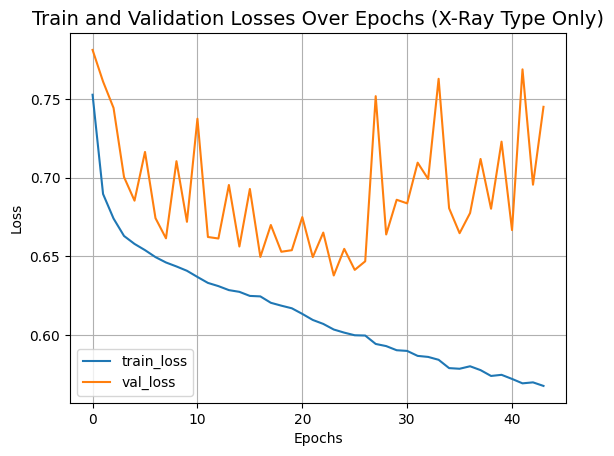

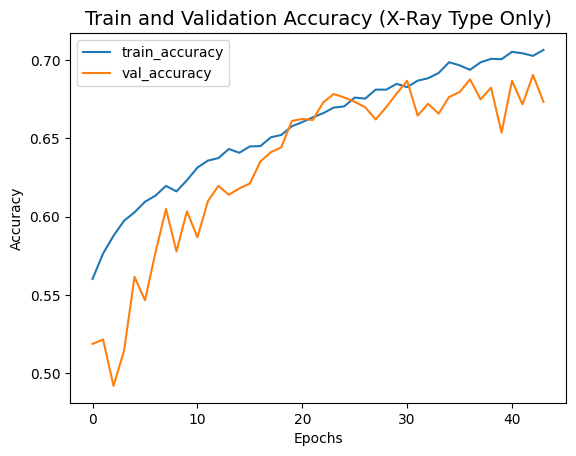

In [ ]:
# Enlargened Model Initial Abnormal Training 150 epochs
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import shutil
from keras import backend as K

# Clear previous session
K.clear_session()
tf.keras.backend.clear_session()

# ---------------------------------------------------
# Hyperparameters
# ---------------------------------------------------
image_dimension = 256
stem_filters = 64
patch_size = (4, 4)
dropout_rate = 0.3  # Increased dropout rate
num_heads = 8
embed_dim = 384
num_mlp = 1024
qkv_bias = True
window_size = 8
shift_size = 4
num_patch_x = 16
num_patch_y = 16
learning_rate = 1e-5  # Fixed lower learning rate
batch_size = 256
num_epochs = 150
weight_decay = 1e-4

# ---------------------------------------------------
# Define Helper Functions and Custom Layers
# ---------------------------------------------------
def window_partition(x, window_size):
    _, height, width, channels = x.shape
    patch_num_y = height // window_size
    patch_num_x = width // window_size
    x = tf.reshape(x, (-1, patch_num_y, window_size, patch_num_x, window_size, channels))
    x = tf.transpose(x, perm=(0, 1, 3, 2, 4, 5))
    windows = tf.reshape(x, (-1, window_size, window_size, channels))
    return windows

def window_reverse(windows, window_size, height, width, channels):
    patch_num_y = height // window_size
    patch_num_x = width // window_size
    x = tf.reshape(windows, (-1, patch_num_y, patch_num_x, window_size, window_size, channels))
    x = tf.transpose(x, perm=(0, 1, 3, 2, 4, 5))
    x = tf.reshape(x, (-1, height, width, channels))
    return x

class WindowAttention(layers.Layer):
    def __init__(self, dim, window_size, num_heads, qkv_bias=True, dropout_rate=0.0, **kwargs):
        super().__init__(**kwargs)
        self.dim = dim
        self.window_size = window_size
        self.num_heads = num_heads
        self.scale = (dim // num_heads) ** -0.5
        self.qkv = layers.Dense(dim * 3, use_bias=qkv_bias)
        self.dropout = layers.Dropout(dropout_rate)
        self.proj = layers.Dense(dim)
        num_window_elements = (2 * self.window_size[0] - 1) * (2 * self.window_size[1] - 1)
        self.relative_position_bias_table = self.add_weight(
            shape=(num_window_elements, self.num_heads),
            initializer=tf.keras.initializers.Zeros(),
            trainable=True,
            name="relative_position_bias_table"
        )
        coords_h = np.arange(self.window_size[0])
        coords_w = np.arange(self.window_size[1])
        coords = np.stack(np.meshgrid(coords_h, coords_w, indexing="ij"))
        coords_flatten = np.reshape(coords, (2, -1))
        relative_coords = coords_flatten[:, :, None] - coords_flatten[:, None, :]
        relative_coords = np.transpose(relative_coords, (1, 2, 0))
        relative_coords[:, :, 0] += self.window_size[0] - 1
        relative_coords[:, :, 1] += self.window_size[1] - 1
        relative_coords[:, :, 0] *= 2 * self.window_size[1] - 1
        relative_position_index = np.sum(relative_coords, axis=-1)
        self.relative_position_index = tf.Variable(
            initial_value=tf.convert_to_tensor(relative_position_index),
            trainable=False,
            name="relative_position_index"
        )

    def call(self, x, mask=None):
        _, size, channels = x.shape
        head_dim = channels // self.num_heads
        x_qkv = self.qkv(x)
        x_qkv = tf.reshape(x_qkv, (-1, size, 3, self.num_heads, head_dim))
        x_qkv = tf.transpose(x_qkv, perm=(2, 0, 3, 1, 4))
        q, k, v = x_qkv[0], x_qkv[1], x_qkv[2]
        q = q * self.scale
        k = tf.transpose(k, perm=(0, 1, 3, 2))
        attn = q @ k
        num_window_elements = self.window_size[0] * self.window_size[1]
        relative_position_index_flat = tf.reshape(self.relative_position_index, (-1,))
        relative_position_bias = tf.gather(self.relative_position_bias_table, relative_position_index_flat)
        relative_position_bias = tf.reshape(relative_position_bias, (num_window_elements, num_window_elements, -1))
        relative_position_bias = tf.transpose(relative_position_bias, perm=(2, 0, 1))
        attn = attn + tf.expand_dims(relative_position_bias, axis=0)
        if mask is not None:
            nW = mask.shape[0]
            mask_float = tf.cast(tf.expand_dims(tf.expand_dims(mask, axis=1), axis=0), tf.float32)
            attn = tf.reshape(attn, (-1, nW, self.num_heads, size, size)) + mask_float
            attn = tf.reshape(attn, (-1, self.num_heads, size, size))
            attn = tf.keras.activations.softmax(attn, axis=-1)
        else:
            attn = tf.keras.activations.softmax(attn, axis=-1)
        attn = self.dropout(attn)
        x_qkv = attn @ v
        x_qkv = tf.transpose(x_qkv, perm=(0, 2, 1, 3))
        x_qkv = tf.reshape(x_qkv, (-1, size, channels))
        x_qkv = self.proj(x_qkv)
        x_qkv = self.dropout(x_qkv)
        return x_qkv

class SwinTransformer(layers.Layer):
    def __init__(self, dim, num_patch, num_heads, window_size=7, shift_size=0,
                 num_mlp=1024, qkv_bias=True, dropout_rate=0.0, **kwargs):
        super().__init__(**kwargs)
        self.dim = dim
        self.num_patch = num_patch
        self.num_heads = num_heads
        self.window_size = window_size
        self.shift_size = shift_size
        self.num_mlp = num_mlp
        self.norm1 = layers.LayerNormalization(epsilon=1e-5)
        self.attn = WindowAttention(
            dim,
            window_size=(self.window_size, self.window_size),
            num_heads=num_heads,
            qkv_bias=qkv_bias,
            dropout_rate=dropout_rate,
        )
        self.drop_path = layers.Dropout(dropout_rate)
        self.norm2 = layers.LayerNormalization(epsilon=1e-5)
        self.mlp = tf.keras.Sequential([
            layers.Dense(num_mlp),
            layers.Activation(tf.keras.activations.gelu),
            layers.Dropout(dropout_rate),
            layers.Dense(dim),
            layers.Dropout(dropout_rate),
        ])
        if min(self.num_patch) < self.window_size:
            self.shift_size = 0
            self.window_size = min(self.num_patch)

    def build(self, input_shape):
        if self.shift_size == 0:
            self.attn_mask = None
        else:
            height, width = self.num_patch
            h_slices = (slice(0, -self.window_size),
                        slice(-self.window_size, -self.shift_size),
                        slice(-self.shift_size, None))
            w_slices = (slice(0, -self.window_size),
                        slice(-self.window_size, -self.shift_size),
                        slice(-self.shift_size, None))
            mask_array = np.zeros((1, height, width, 1))
            count = 0
            for h in h_slices:
                for w in w_slices:
                    mask_array[:, h, w, :] = count
                    count += 1
            mask_array = tf.convert_to_tensor(mask_array)
            mask_windows = window_partition(mask_array, self.window_size)
            mask_windows = tf.reshape(mask_windows, [-1, self.window_size * self.window_size])
            attn_mask = tf.expand_dims(mask_windows, axis=1) - tf.expand_dims(mask_windows, axis=2)
            attn_mask = tf.where(attn_mask != 0, -100.0, attn_mask)
            attn_mask = tf.where(attn_mask == 0, 0.0, attn_mask)
            self.attn_mask = tf.Variable(attn_mask, trainable=False)

    def call(self, x, training=False):
        height, width = self.num_patch
        x_skip = x
        x = self.norm1(x)
        x = tf.reshape(x, (-1, height, width, x.shape[-1]))
        if self.shift_size > 0:
            shifted_x = tf.roll(x, shift=[-self.shift_size, -self.shift_size], axis=[1, 2])
        else:
            shifted_x = x
        x_windows = window_partition(shifted_x, self.window_size)
        x_windows = tf.reshape(x_windows, (-1, self.window_size * self.window_size, x.shape[-1]))
        attn_windows = self.attn(x_windows, mask=self.attn_mask)
        attn_windows = tf.reshape(attn_windows, (-1, self.window_size, self.window_size, x.shape[-1]))
        shifted_x = window_reverse(attn_windows, self.window_size, height, width, x.shape[-1])
        if self.shift_size > 0:
            x = tf.roll(shifted_x, shift=[self.shift_size, self.shift_size], axis=[1, 2])
        else:
            x = shifted_x
        x = tf.reshape(x, (-1, height * width, x.shape[-1]))
        x = self.drop_path(x, training=training)
        x = x_skip + x
        x_skip = x
        x = self.norm2(x)
        x = self.mlp(x, training=training)
        x = self.drop_path(x, training=training)
        x = x_skip + x
        return x

# ---------------------------------------------------------
# Build a ResNet-Inspired Stem for Feature Extraction
# ---------------------------------------------------------
def resnet_stem(inputs):
    x = layers.Conv2D(64, kernel_size=7, strides=2, padding='same', activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)
    shortcut = x
    x = layers.Conv2D(64, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, kernel_size=3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.add([x, shortcut])
    x = layers.Activation('relu')(x)
    return x

# ---------------------------------------------------------
# Build the X-Ray Type Classification Model
# ---------------------------------------------------------
inputs = tf.keras.Input(shape=(image_dimension, image_dimension, 3))
stem_out = resnet_stem(inputs)
stem_feature_map = stem_out
new_patch_size = (4, 4)

def patch_extract_stem(images, patch_size):
    b_size = tf.shape(images)[0]
    patches = tf.image.extract_patches(
        images=images,
        sizes=(1, patch_size[0], patch_size[1], 1),
        strides=(1, patch_size[0], patch_size[1], 1),
        rates=(1, 1, 1, 1),
        padding="VALID"
    )
    patch_dim = patches.shape[-1]
    patch_num = patches.shape[1]
    return tf.reshape(patches, (b_size, patch_num * patch_num, patch_dim))

patches = layers.Lambda(lambda x: patch_extract_stem(x, new_patch_size))(stem_feature_map)
proj_patches = layers.Dense(embed_dim)(patches)
pos_embed = layers.Embedding(input_dim=256, output_dim=embed_dim)
positions = tf.range(start=0, limit=256, delta=1)
proj_patches = proj_patches + pos_embed(positions)

# Reduce the number of Swin Transformer blocks to 3
x = proj_patches
for i in range(3):  # Changed from 6 to 3
    shift = 0 if i % 2 == 0 else shift_size
    x = SwinTransformer(dim=embed_dim, num_patch=(16, 16),
                        num_heads=num_heads, window_size=window_size, shift_size=shift,
                        num_mlp=num_mlp, qkv_bias=qkv_bias, dropout_rate=dropout_rate)(x)

x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(dropout_rate)(x)

# Classification head
abnormal_output = tf.keras.Sequential([
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.3),  # Increased dropout rate
    layers.Dense(1, activation="sigmoid")
])(x)

model = tf.keras.Model(inputs, outputs=abnormal_output)
model.summary()

# Compile with fixed learning rate
model.compile(
    optimizer=tf.keras.optimizers.AdamW(learning_rate=learning_rate, weight_decay=weight_decay),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name="accuracy")]
)

# ---------------------------------------------------------
# Create the Datasets for X-Ray Type Classification
# ---------------------------------------------------------
def load_and_preprocess(image_path, label):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [image_dimension, image_dimension])
    image = image / 255.0  # Normalize to [0, 1]
    label = tf.cast(label, tf.int32)  # Ensure label is an integer
    return image, label

def augment(image):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1)
    return image

# Ensure labels are binary (0 or 1)
train_df["label"] = train_df["label"].astype(int)
valid_df["label"] = valid_df["label"].astype(int)

# Build training dataset
train_ds = tf.data.Dataset.from_tensor_slices((train_df["image_path"].values,
                                               train_df["label"].values))
train_ds = train_ds.shuffle(buffer_size=len(train_df), reshuffle_each_iteration=True)
train_ds = train_ds.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.map(lambda img, label: (augment(img), label), num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.batch(batch_size)
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)

# Build validation dataset
val_ds = tf.data.Dataset.from_tensor_slices((valid_df["image_path"].values,
                                             valid_df["label"].values))
val_ds = val_ds.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.batch(batch_size)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

# ---------------------------------------------------------
# Define Callbacks for Training
# ---------------------------------------------------------
checkpoint_path2 = "/content/BigABSwinTransformerMultiTaskFixedLR.keras"
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=20, mode='min', restore_best_weights=True  # Monitor val_loss
)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path2, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1
)

# ---------------------------------------------------------
# Train the Multi-Task Model
# ---------------------------------------------------------
history = model.fit(
    train_ds,
    epochs=num_epochs,
    validation_data=val_ds,
    callbacks=[early_stop, checkpoint_cb],
    verbose=1
)

# ---------------------------------------------------------
# Optionally copy checkpoint to Drive
# ---------------------------------------------------------
shutil.copy(checkpoint_path2, "/content/drive/MyDrive/mura_tuning/mura_xray_cnn/BigABSwinTransformerTypeOnly.keras")

# ---------------------------------------------------------
# Plot Training Curves
# ---------------------------------------------------------
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs (X-Ray Type Only)", fontsize=14)
plt.legend()
plt.grid()
plt.show()
plt.plot(history.history["accuracy"], label="train_accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Train and Validation Accuracy (X-Ray Type Only)", fontsize=14)
plt.legend()
plt.show()

In [ ]:
#Second Training of Abnormal
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import shutil
from keras import backend as K
from sklearn.utils import class_weight

# Clear previous session
K.clear_session()
tf.keras.backend.clear_session()

# ---------------------------------------------------
# Hyperparameters
# ---------------------------------------------------
image_dimension = 256
stem_filters = 64
patch_size = (4, 4)
dropout_rate = 0.5  # Increased dropout rate
num_heads = 8
embed_dim = 384
num_mlp = 1024
qkv_bias = True
window_size = 8
shift_size = 4
num_patch_x = 16
num_patch_y = 16
learning_rate = 1e-5  # Fixed lower learning rate
batch_size = 128
num_epochs = 60
weight_decay = 1e-4

# ---------------------------------------------------
# Define Helper Functions and Custom Layers
# ---------------------------------------------------
def window_partition(x, window_size):
    _, height, width, channels = x.shape
    patch_num_y = height // window_size
    patch_num_x = width // window_size
    x = tf.reshape(x, (-1, patch_num_y, window_size, patch_num_x, window_size, channels))
    x = tf.transpose(x, perm=(0, 1, 3, 2, 4, 5))
    windows = tf.reshape(x, (-1, window_size, window_size, channels))
    return windows

def window_reverse(windows, window_size, height, width, channels):
    patch_num_y = height // window_size
    patch_num_x = width // window_size
    x = tf.reshape(windows, (-1, patch_num_y, patch_num_x, window_size, window_size, channels))
    x = tf.transpose(x, perm=(0, 1, 3, 2, 4, 5))
    x = tf.reshape(x, (-1, height, width, channels))
    return x

class WindowAttention(layers.Layer):
    def __init__(self, dim, window_size, num_heads, qkv_bias=True, dropout_rate=0.0, **kwargs):
        super().__init__(**kwargs)
        self.dim = dim
        self.window_size = window_size
        self.num_heads = num_heads
        self.scale = (dim // num_heads) ** -0.5
        self.qkv = layers.Dense(dim * 3, use_bias=qkv_bias)
        self.dropout = layers.Dropout(dropout_rate)
        self.proj = layers.Dense(dim)
        num_window_elements = (2 * self.window_size[0] - 1) * (2 * self.window_size[1] - 1)
        self.relative_position_bias_table = self.add_weight(
            shape=(num_window_elements, self.num_heads),
            initializer=tf.keras.initializers.Zeros(),
            trainable=True,
            name="relative_position_bias_table"
        )
        coords_h = np.arange(self.window_size[0])
        coords_w = np.arange(self.window_size[1])
        coords = np.stack(np.meshgrid(coords_h, coords_w, indexing="ij"))
        coords_flatten = np.reshape(coords, (2, -1))
        relative_coords = coords_flatten[:, :, None] - coords_flatten[:, None, :]
        relative_coords = np.transpose(relative_coords, (1, 2, 0))
        relative_coords[:, :, 0] += self.window_size[0] - 1
        relative_coords[:, :, 1] += self.window_size[1] - 1
        relative_coords[:, :, 0] *= 2 * self.window_size[1] - 1
        relative_position_index = np.sum(relative_coords, axis=-1)
        self.relative_position_index = tf.Variable(
            initial_value=tf.convert_to_tensor(relative_position_index),
            trainable=False,
            name="relative_position_index"
        )

    def call(self, x, mask=None):
        _, size, channels = x.shape
        head_dim = channels // self.num_heads
        x_qkv = self.qkv(x)
        x_qkv = tf.reshape(x_qkv, (-1, size, 3, self.num_heads, head_dim))
        x_qkv = tf.transpose(x_qkv, perm=(2, 0, 3, 1, 4))
        q, k, v = x_qkv[0], x_qkv[1], x_qkv[2]
        q = q * self.scale
        k = tf.transpose(k, perm=(0, 1, 3, 2))
        attn = q @ k
        num_window_elements = self.window_size[0] * self.window_size[1]
        relative_position_index_flat = tf.reshape(self.relative_position_index, (-1,))
        relative_position_bias = tf.gather(self.relative_position_bias_table, relative_position_index_flat)
        relative_position_bias = tf.reshape(relative_position_bias, (num_window_elements, num_window_elements, -1))
        relative_position_bias = tf.transpose(relative_position_bias, perm=(2, 0, 1))
        attn = attn + tf.expand_dims(relative_position_bias, axis=0)
        if mask is not None:
            nW = mask.shape[0]
            mask_float = tf.cast(tf.expand_dims(tf.expand_dims(mask, axis=1), axis=0), tf.float32)
            attn = tf.reshape(attn, (-1, nW, self.num_heads, size, size)) + mask_float
            attn = tf.reshape(attn, (-1, self.num_heads, size, size))
            attn = tf.keras.activations.softmax(attn, axis=-1)
        else:
            attn = tf.keras.activations.softmax(attn, axis=-1)
        attn = self.dropout(attn)
        x_qkv = attn @ v
        x_qkv = tf.transpose(x_qkv, perm=(0, 2, 1, 3))
        x_qkv = tf.reshape(x_qkv, (-1, size, channels))
        x_qkv = self.proj(x_qkv)
        x_qkv = self.dropout(x_qkv)
        return x_qkv

class SwinTransformer(layers.Layer):
    def __init__(self, dim, num_patch, num_heads, window_size=7, shift_size=0,
                 num_mlp=1024, qkv_bias=True, dropout_rate=0.0, **kwargs):
        super().__init__(**kwargs)
        self.dim = dim
        self.num_patch = num_patch
        self.num_heads = num_heads
        self.window_size = window_size
        self.shift_size = shift_size
        self.num_mlp = num_mlp
        self.norm1 = layers.LayerNormalization(epsilon=1e-5)
        self.attn = WindowAttention(
            dim,
            window_size=(self.window_size, self.window_size),
            num_heads=num_heads,
            qkv_bias=qkv_bias,
            dropout_rate=dropout_rate,
        )
        self.drop_path = layers.Dropout(dropout_rate)
        self.norm2 = layers.LayerNormalization(epsilon=1e-5)
        self.mlp = tf.keras.Sequential([
            layers.Dense(num_mlp),
            layers.Activation(tf.keras.activations.gelu),
            layers.Dropout(dropout_rate),
            layers.Dense(dim),
            layers.Dropout(dropout_rate),
        ])
        if min(self.num_patch) < self.window_size:
            self.shift_size = 0
            self.window_size = min(self.num_patch)

    def build(self, input_shape):
        if self.shift_size == 0:
            self.attn_mask = None
        else:
            height, width = self.num_patch
            h_slices = (slice(0, -self.window_size),
                        slice(-self.window_size, -self.shift_size),
                        slice(-self.shift_size, None))
            w_slices = (slice(0, -self.window_size),
                        slice(-self.window_size, -self.shift_size),
                        slice(-self.shift_size, None))
            mask_array = np.zeros((1, height, width, 1))
            count = 0
            for h in h_slices:
                for w in w_slices:
                    mask_array[:, h, w, :] = count
                    count += 1
            mask_array = tf.convert_to_tensor(mask_array)
            mask_windows = window_partition(mask_array, self.window_size)
            mask_windows = tf.reshape(mask_windows, [-1, self.window_size * self.window_size])
            attn_mask = tf.expand_dims(mask_windows, axis=1) - tf.expand_dims(mask_windows, axis=2)
            attn_mask = tf.where(attn_mask != 0, -100.0, attn_mask)
            attn_mask = tf.where(attn_mask == 0, 0.0, attn_mask)
            self.attn_mask = tf.Variable(attn_mask, trainable=False)

    def call(self, x, training=False):
        height, width = self.num_patch
        x_skip = x
        x = self.norm1(x)
        x = tf.reshape(x, (-1, height, width, x.shape[-1]))
        if self.shift_size > 0:
            shifted_x = tf.roll(x, shift=[-self.shift_size, -self.shift_size], axis=[1, 2])
        else:
            shifted_x = x
        x_windows = window_partition(shifted_x, self.window_size)
        x_windows = tf.reshape(x_windows, (-1, self.window_size * self.window_size, x.shape[-1]))
        attn_windows = self.attn(x_windows, mask=self.attn_mask)
        attn_windows = tf.reshape(attn_windows, (-1, self.window_size, self.window_size, x.shape[-1]))
        shifted_x = window_reverse(attn_windows, self.window_size, height, width, x.shape[-1])
        if self.shift_size > 0:
            x = tf.roll(shifted_x, shift=[self.shift_size, self.shift_size], axis=[1, 2])
        else:
            x = shifted_x
        x = tf.reshape(x, (-1, height * width, x.shape[-1]))
        x = self.drop_path(x, training=training)
        x = x_skip + x
        x_skip = x
        x = self.norm2(x)
        x = self.mlp(x, training=training)
        x = self.drop_path(x, training=training)
        x = x_skip + x
        return x

# ---------------------------------------------------------
# Build a ResNet-Inspired Stem for Feature Extraction
# ---------------------------------------------------------
def resnet_stem(inputs):
    x = layers.Conv2D(64, kernel_size=7, strides=2, padding='same', activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)
    shortcut = x
    x = layers.Conv2D(64, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, kernel_size=3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.add([x, shortcut])
    x = layers.Activation('relu')(x)
    return x

# Define patch_extract_stem function
def patch_extract_stem(images, patch_size):
    b_size = tf.shape(images)[0]
    patches = tf.image.extract_patches(
        images=images,
        sizes=(1, patch_size[0], patch_size[1], 1),
        strides=(1, patch_size[0], patch_size[1], 1),
        rates=(1, 1, 1, 1),
        padding="VALID"
    )
    patch_dim = patches.shape[-1]
    patch_num = patches.shape[1]
    return tf.reshape(patches, (b_size, patch_num * patch_num, patch_dim))

# ---------------------------------------------------------
# Rebuild the Model with Explicit Output Shape for Lambda Layer
# ---------------------------------------------------------
inputs = tf.keras.Input(shape=(image_dimension, image_dimension, 3))
stem_out = resnet_stem(inputs)
stem_feature_map = stem_out
new_patch_size = (4, 4)

# Define the Lambda layer with explicit output_shape
# Output shape is (num_patches, patch_dim) = (256, 1024)
patches = layers.Lambda(
    lambda x: patch_extract_stem(x, new_patch_size),
    output_shape=(256, 1024)  # Specify the output shape
)(stem_feature_map)

proj_patches = layers.Dense(embed_dim)(patches)
pos_embed = layers.Embedding(input_dim=256, output_dim=embed_dim)
positions = tf.range(start=0, limit=256, delta=1)
proj_patches = proj_patches + pos_embed(positions)

# Reduce the number of Swin Transformer blocks to 3
x = proj_patches
for i in range(3):  # Changed from 6 to 3
    shift = 0 if i % 2 == 0 else shift_size
    x = SwinTransformer(dim=embed_dim, num_patch=(16, 16),
                        num_heads=num_heads, window_size=window_size, shift_size=shift,
                        num_mlp=num_mlp, qkv_bias=qkv_bias, dropout_rate=dropout_rate)(x)

x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(dropout_rate)(x)

# Classification head
abnormal_output = tf.keras.Sequential([
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.4),  # Increased dropout rate
    layers.Dense(1, activation="sigmoid")
])(x)

# Create the model
model = tf.keras.Model(inputs, outputs=abnormal_output)

# Load the weights from the saved model
model_path = "/content/drive/MyDrive/mura_tuning/mura_xray_cnn/BigABSwinTransformerTypeOnly.keras"
model.load_weights(model_path)

for layer in model.layers:
    if 'conv2d' in layer.name or 'batch_normalization' in layer.name or 'max_pooling2d' in layer.name:
        layer.trainable = False

model.layers[3].trainable = False  # Adjust index as needed
# Compile with fixed learning rate
from tensorflow.keras.optimizers import SGD
model.compile(
    optimizer=SGD(learning_rate=5e-5, momentum=0.9),
    loss=tf.keras.losses.BinaryFocalCrossentropy(gamma=2.0),
    metrics=[tf.keras.metrics.BinaryAccuracy(name="accuracy")]
)

# Optional: Print model summary to verify
model.summary()

# ---------------------------------------------------
# Create the Datasets for X-Ray Type Classification
# ---------------------------------------------------
def load_and_preprocess(image_path, label):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [image_dimension, image_dimension])
    image = image / 255.0  # Normalize to [0, 1]
    label = tf.cast(label, tf.int32)  # Ensure label is an integer
    return image, label

def augment(image):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1)
    image = tf.image.rot90(image, k=tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))  # Random 0-270° rotation
    zoom_factor = tf.random.uniform([], 0.9, 1.1)  # Zoom in/out by 10%
    image = tf.image.resize(image, [int(image_dimension * zoom_factor), int(image_dimension * zoom_factor)])
    image = tf.image.resize_with_pad(image, image_dimension, image_dimension)  # Pad back to original size
    return image

# Ensure labels are binary (0 or 1)
train_df["label"] = train_df["label"].astype(int)
valid_df["label"] = valid_df["label"].astype(int)

# Build training dataset
train_ds = tf.data.Dataset.from_tensor_slices((train_df["image_path"].values,
                                               train_df["label"].values))
train_ds = train_ds.shuffle(buffer_size=len(train_df), reshuffle_each_iteration=True)
train_ds = train_ds.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.map(lambda img, label: (augment(img), label), num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.batch(batch_size)
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)

# Build validation dataset
val_ds = tf.data.Dataset.from_tensor_slices((valid_df["image_path"].values,
                                             valid_df["label"].values))
val_ds = val_ds.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.batch(batch_size)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

# ---------------------------------------------------
# Define Callbacks for Training
# ---------------------------------------------------
checkpoint_path2 = "/content/RetrainedBigABSwinTransformerMultiTaskFixedLR.keras"
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', patience=20, mode='max', restore_best_weights=True  # Monitor val_accuracy
)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path2, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1
)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=4,
    min_lr=1e-6
)

# Compute class weights for handling imbalance
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_df['label']),
    y=train_df['label']
)
class_weights_dict = dict(enumerate(class_weights))

# ---------------------------------------------------
# Train the Model
# ---------------------------------------------------
history = model.fit(
    train_ds,
    epochs=num_epochs,
    validation_data=val_ds,
    callbacks=[lr_scheduler, early_stop, checkpoint_cb],
    class_weight=class_weights_dict,
    verbose=1
)

# ---------------------------------------------------
# Optionally copy checkpoint to Drive
# ---------------------------------------------------
shutil.copy(checkpoint_path2, "/content/drive/MyDrive/mura_tuning/mura_xray_cnn/RetrainedBigABSwinTransformerTypeOnly.keras")

# ---------------------------------------------------
# Plot Training Curves
# ---------------------------------------------------
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs (X-Ray Type Only)", fontsize=14)
plt.legend()
plt.grid()
plt.show()

plt.plot(history.history["accuracy"], label="train_accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Train and Validation Accuracy (X-Ray Type Only)", fontsize=14)
plt.legend()
plt.show()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 128, 128, 64)   │          9,472 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 128, 128, 64)   │            256 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 64, 64, 64)     │              0 │ batch_normalization[0… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 64, 64, 64)     │         36,928 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 64, 64, 64)     │            256 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 64, 64, 64)     │         36,928 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 64, 64, 64)     │            256 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 64, 64, 64)     │              0 │ batch_normalization_2… │
│                           │                        │                │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 64, 64, 64)     │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda (Lambda)           │ (None, 256, 1024)      │              0 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 256, 384)       │        393,600 │ lambda[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 256, 384)       │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ swin_transformer          │ (None, 256, 384)       │      1,382,536 │ add_1[0][0]            │
│ (SwinTransformer)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ swin_transformer_1        │ (None, 256, 384)       │      1,382,536 │ swin_transformer[0][0] │
│ (SwinTransformer)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ swin_transformer_2        │ (None, 256, 384)       │      1,382,536 │ swin_transformer_1[0]… │
│ (SwinTransformer)    

 Total params: 4,724,121 (18.02 MB)

 Trainable params: 4,640,025 (17.70 MB)

 Non-trainable params: 84,096 (328.50 KB)

Epoch 1/60
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.6207 - loss: 0.2039 
Epoch 1: val_accuracy improved from -inf to 0.61558, saving model to /content/RetrainedBigABSwinTransformerMultiTaskFixedLR.keras
288/288 ━━━━━━━━━━━━━━━━━━━━ 3768s 13s/step - accuracy: 0.6207 - loss: 0.2039 - val_accuracy: 0.6156 - val_loss: 0.6019 - learning_rate: 5.0000e-05
Epoch 2/60
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - accuracy: 0.6204 - loss: 0.1788
Epoch 2: val_accuracy did not improve from 0.61558
288/288 ━━━━━━━━━━━━━━━━━━━━ 71s 247ms/step - accuracy: 0.6203 - loss: 0.1789 - val_accuracy: 0.6084 - val_loss: 0.5661 - learning_rate: 5.0000e-05
Epoch 3/60
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - accuracy: 0.6105 - loss: 0.1778
Epoch 3: val_accuracy improved from 0.61558 to 0.61902, saving model to /content/RetrainedBigABSwinTransformerMultiTaskFixedLR.keras
288/288 ━━━━━━━━━━━━━━━━━━━━ 72s 248ms/step - accuracy: 0.6105 - loss: 0.1778 - val_accuracy: 0.6190 - val_loss: 0.4709 - learn

KeyboardInterrupt: 

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers


def window_partition(x, window_size):
    # x shape: (batch, height, width, channels)
    _, height, width, channels = x.shape
    patch_num_y = height // window_size
    patch_num_x = width // window_size
    x = tf.reshape(x, (-1, patch_num_y, window_size, patch_num_x, window_size, channels))
    x = tf.transpose(x, perm=(0, 1, 3, 2, 4, 5))
    windows = tf.reshape(x, (-1, window_size, window_size, channels))
    return windows

def window_reverse(windows, window_size, height, width, channels):
    patch_num_y = height // window_size
    patch_num_x = width // window_size
    x = tf.reshape(windows, (-1, patch_num_y, patch_num_x, window_size, window_size, channels))
    x = tf.transpose(x, perm=(0, 1, 3, 2, 4, 5))
    x = tf.reshape(x, (-1, height, width, channels))
    return x
# Define custom layers used in your model
class WindowAttention(layers.Layer):
    def __init__(self, dim, window_size, num_heads, qkv_bias=True, dropout_rate=0.0, **kwargs):
        super().__init__(**kwargs)
        self.dim = dim
        self.window_size = window_size
        self.num_heads = num_heads
        self.scale = (dim // num_heads) ** -0.5
        self.qkv = layers.Dense(dim * 3, use_bias=qkv_bias)
        self.dropout = layers.Dropout(dropout_rate)
        self.proj = layers.Dense(dim)
        num_window_elements = (2 * self.window_size[0] - 1) * (2 * self.window_size[1] - 1)
        self.relative_position_bias_table = self.add_weight(
            shape=(num_window_elements, self.num_heads),
            initializer=tf.keras.initializers.Zeros(),
            trainable=True,
            name="relative_position_bias_table"
        )
        coords_h = np.arange(self.window_size[0])
        coords_w = np.arange(self.window_size[1])
        coords = np.stack(np.meshgrid(coords_h, coords_w, indexing="ij"))
        coords_flatten = np.reshape(coords, (2, -1))
        relative_coords = coords_flatten[:, :, None] - coords_flatten[:, None, :]
        relative_coords = np.transpose(relative_coords, (1, 2, 0))
        relative_coords[:, :, 0] += self.window_size[0] - 1
        relative_coords[:, :, 1] += self.window_size[1] - 1
        relative_coords[:, :, 0] *= 2 * self.window_size[1] - 1
        relative_position_index = np.sum(relative_coords, axis=-1)
        self.relative_position_index = tf.Variable(
            initial_value=tf.convert_to_tensor(relative_position_index),
            trainable=False,
            name="relative_position_index"
        )

    def call(self, x, mask=None):
        _, size, channels = x.shape
        head_dim = channels // self.num_heads
        x_qkv = self.qkv(x)
        x_qkv = tf.reshape(x_qkv, (-1, size, 3, self.num_heads, head_dim))
        x_qkv = tf.transpose(x_qkv, perm=(2, 0, 3, 1, 4))
        q, k, v = x_qkv[0], x_qkv[1], x_qkv[2]
        q = q * self.scale
        k = tf.transpose(k, perm=(0, 1, 3, 2))
        attn = q @ k
        num_window_elements = self.window_size[0] * self.window_size[1]
        relative_position_index_flat = tf.reshape(self.relative_position_index, (-1,))
        relative_position_bias = tf.gather(self.relative_position_bias_table, relative_position_index_flat)
        relative_position_bias = tf.reshape(relative_position_bias, (num_window_elements, num_window_elements, -1))
        relative_position_bias = tf.transpose(relative_position_bias, perm=(2, 0, 1))
        attn = attn + tf.expand_dims(relative_position_bias, axis=0)
        if mask is not None:
            nW = mask.shape[0]
            mask_float = tf.cast(tf.expand_dims(tf.expand_dims(mask, axis=1), axis=0), tf.float32)
            attn = tf.reshape(attn, (-1, nW, self.num_heads, size, size)) + mask_float
            attn = tf.reshape(attn, (-1, self.num_heads, size, size))
            attn = tf.keras.activations.softmax(attn, axis=-1)
        else:
            attn = tf.keras.activations.softmax(attn, axis=-1)
        attn = self.dropout(attn)
        x_qkv = attn @ v
        x_qkv = tf.transpose(x_qkv, perm=(0, 2, 1, 3))
        x_qkv = tf.reshape(x_qkv, (-1, size, channels))
        x_qkv = self.proj(x_qkv)
        x_qkv = self.dropout(x_qkv)
        return x_qkv
    def get_config(self):
        config = super(WindowAttention, self).get_config()
        return config

class SwinTransformer(layers.Layer):
    def __init__(self, dim, num_patch, num_heads, window_size=7, shift_size=0,
                 num_mlp=1024, qkv_bias=True, dropout_rate=0.0, **kwargs):
        super().__init__(**kwargs)
        self.dim = dim
        self.num_patch = num_patch
        self.num_heads = num_heads
        self.window_size = window_size
        self.shift_size = shift_size
        self.num_mlp = num_mlp
        self.norm1 = layers.LayerNormalization(epsilon=1e-5)
        self.attn = WindowAttention(
            dim,
            window_size=(self.window_size, self.window_size),
            num_heads=num_heads,
            qkv_bias=qkv_bias,
            dropout_rate=dropout_rate,
        )
        self.drop_path = layers.Dropout(dropout_rate)
        self.norm2 = layers.LayerNormalization(epsilon=1e-5)
        self.mlp = tf.keras.Sequential([
            layers.Dense(num_mlp),
            layers.Activation(tf.keras.activations.gelu),
            layers.Dropout(dropout_rate),
            layers.Dense(dim),
            layers.Dropout(dropout_rate),
        ])
        if min(self.num_patch) < self.window_size:
            self.shift_size = 0
            self.window_size = min(self.num_patch)

    def build(self, input_shape):
        if self.shift_size == 0:
            self.attn_mask = None
        else:
            height, width = self.num_patch
            h_slices = (slice(0, -self.window_size),
                        slice(-self.window_size, -self.shift_size),
                        slice(-self.shift_size, None))
            w_slices = (slice(0, -self.window_size),
                        slice(-self.window_size, -self.shift_size),
                        slice(-self.shift_size, None))
            mask_array = np.zeros((1, height, width, 1))
            count = 0
            for h in h_slices:
                for w in w_slices:
                    mask_array[:, h, w, :] = count
                    count += 1
            mask_array = tf.convert_to_tensor(mask_array)
            mask_windows = window_partition(mask_array, self.window_size)
            mask_windows = tf.reshape(mask_windows, [-1, self.window_size * self.window_size])
            attn_mask = tf.expand_dims(mask_windows, axis=1) - tf.expand_dims(mask_windows, axis=2)
            attn_mask = tf.where(attn_mask != 0, -100.0, attn_mask)
            attn_mask = tf.where(attn_mask == 0, 0.0, attn_mask)
            self.attn_mask = tf.Variable(attn_mask, trainable=False)

    def call(self, x, training=False):
        height, width = self.num_patch
        x_skip = x
        x = self.norm1(x)
        x = tf.reshape(x, (-1, height, width, x.shape[-1]))
        if self.shift_size > 0:
            shifted_x = tf.roll(x, shift=[-self.shift_size, -self.shift_size], axis=[1, 2])
        else:
            shifted_x = x
        x_windows = window_partition(shifted_x, self.window_size)
        x_windows = tf.reshape(x_windows, (-1, self.window_size * self.window_size, x.shape[-1]))
        attn_windows = self.attn(x_windows, mask=self.attn_mask)
        attn_windows = tf.reshape(attn_windows, (-1, self.window_size, self.window_size, x.shape[-1]))
        shifted_x = window_reverse(attn_windows, self.window_size, height, width, x.shape[-1])
        if self.shift_size > 0:
            x = tf.roll(shifted_x, shift=[self.shift_size, self.shift_size], axis=[1, 2])
        else:
            x = shifted_x
        x = tf.reshape(x, (-1, height * width, x.shape[-1]))
        x = self.drop_path(x, training=training)
        x = x_skip + x
        x_skip = x
        x = self.norm2(x)
        x = self.mlp(x, training=training)
        x = self.drop_path(x, training=training)
        x = x_skip + x
        return x
    def get_config(self):
        config = super(SwinTransformer, self).get_config()
        return config

# Function to load and preprocess images
def load_and_preprocess(image_path, label):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [256, 256])  # Match the image size used during training
    image = image / 255.0  # Normalize to [0, 1]
    label = tf.cast(label, tf.int32)  # Ensure label is an integer
    return image, label

# Load your validation data
# Replace "path/to/validation_data.csv" with the actual path to your validation CSV

# Ensure valid_df has 'image_path' and 'label' columns

# Load the pre-trained model from the specified path
model_path = "/content/drive/MyDrive/mura_tuning/mura_xray_cnn/BigABSwinTransformerTypeOnly.keras"
custom_objects = {
    "WindowAttention": WindowAttention,
    "SwinTransformer": SwinTransformer,
}
model = tf.keras.models.load_model(model_path, custom_objects=custom_objects, safe_mode=False)

# Sample 100 random images from the validation set
sample_df = valid_df.sample(n=100, random_state=42)

# Create a TensorFlow dataset for the sampled images
sample_ds = tf.data.Dataset.from_tensor_slices((sample_df["image_path"].values, sample_df["label"].values))
sample_ds = sample_ds.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
sample_ds = sample_ds.batch(32)  # Batch size for prediction
sample_ds = sample_ds.prefetch(tf.data.AUTOTUNE)

# Make predictions using the loaded model
predictions = model.predict(sample_ds)
predicted_probabilities = predictions.flatten()  # Flatten if your model outputs a single probability per image
predicted_labels = (predicted_probabilities > 0.5).astype(int)  # Threshold at 0.5 for binary classification

# Get the true labels from the sample
true_labels = sample_df["label"].values

# Display the results
results_df = pd.DataFrame({
    "image_path": sample_df["image_path"],
    "true_label": true_labels,
    "predicted_probability": predicted_probabilities,
    "predicted_label": predicted_labels
})
print("\nPredictions on 100 Random Validation Images:")
print(results_df)

# Calculate and display accuracy on the sample
accuracy = np.mean(predicted_labels == true_labels)
print(f"\nAccuracy on the 100-image sample: {accuracy:.4f}")

NotImplementedError: Exception encountered when calling Lambda.call().

[1mWe could not automatically infer the shape of the Lambda's output. Please specify the `output_shape` argument for this Lambda layer.[0m

Arguments received by Lambda.call():
  • args=('<KerasTensor shape=(None, 64, 64, 64), dtype=float32, sparse=False, name=keras_tensor_24>',)
  • kwargs={'mask': 'None'}